In [1]:
# Task 1: Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [42]:
# Task 2: Read the data as a data frame 

df_bank = pd.read_csv("bank-full.csv")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [461]:
df_bank.shape

(45211, 17)

In [462]:
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [44]:
# Binary encoding of the target variable
# For yes, we are assigning 1 and for no, we are assigning 0

df_bank['Target'] = df_bank['Target'].apply(lambda inc: 0 if inc == "no" else 1) 
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# EDA

In [464]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [465]:
df_bank['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

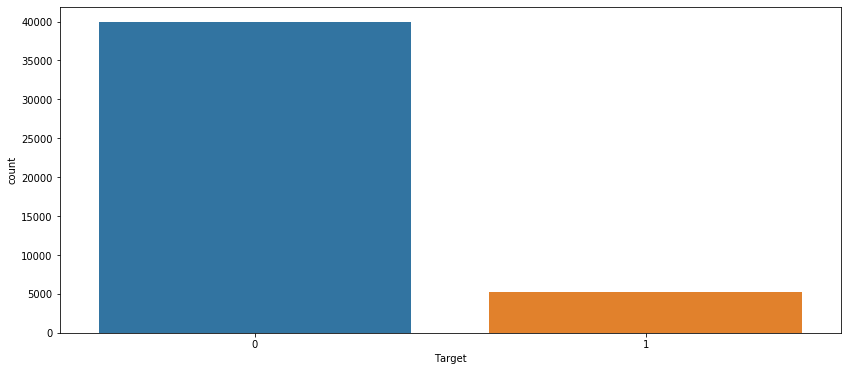

In [466]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['Target'])

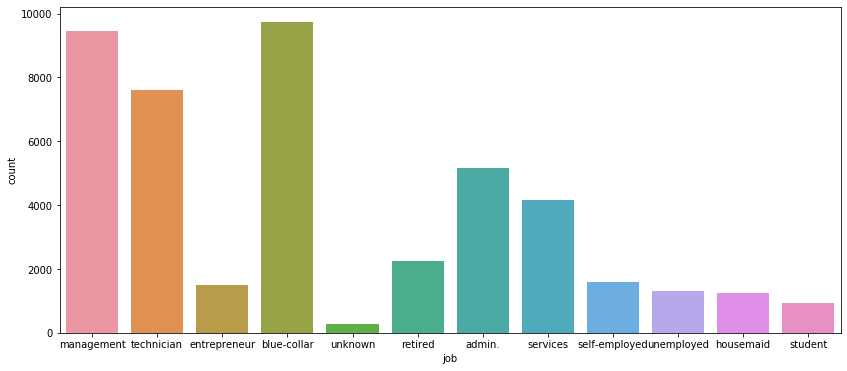

In [467]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['job'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

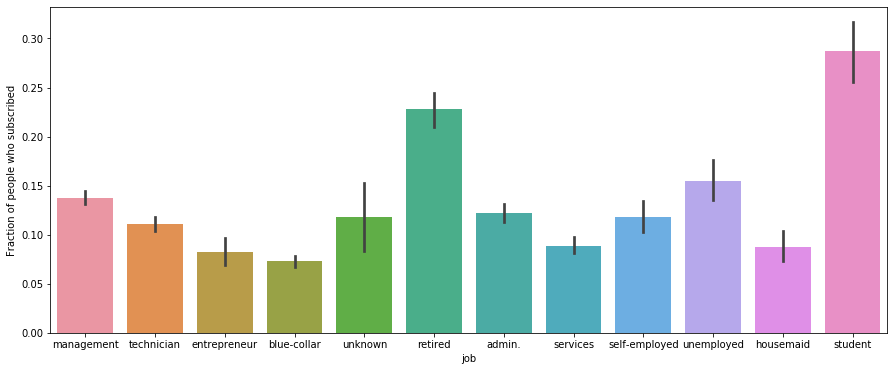

In [468]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='job',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

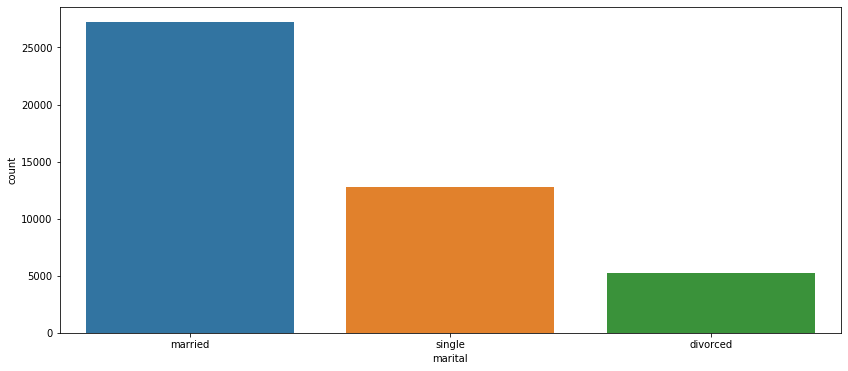

In [469]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['marital'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

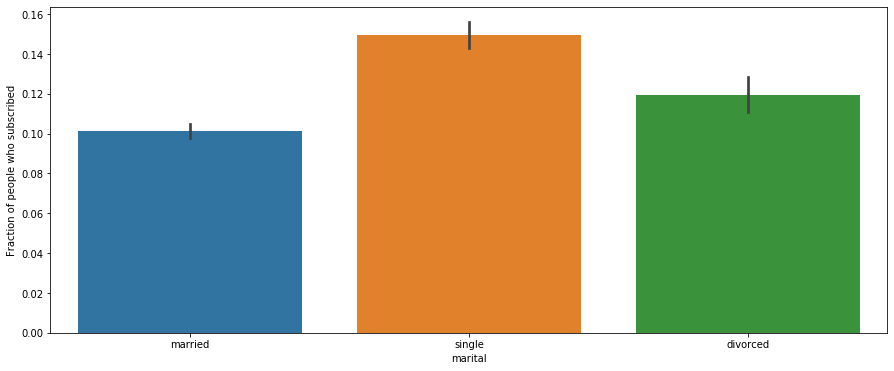

In [470]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='marital',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

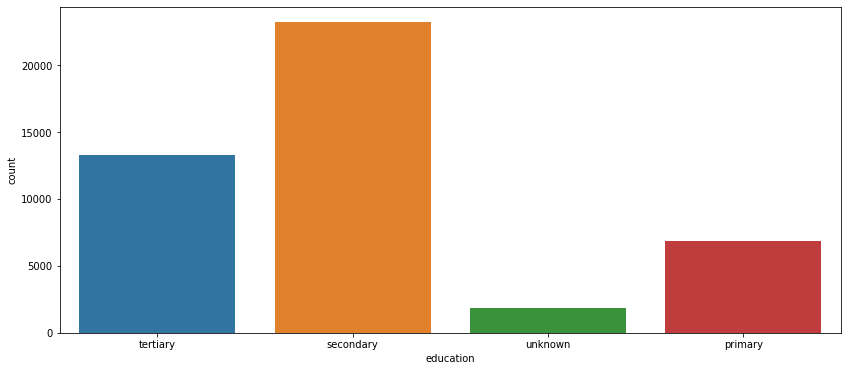

In [471]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['education'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

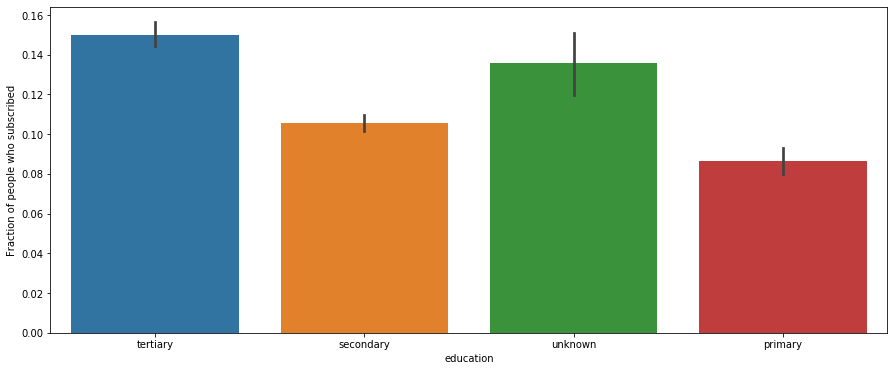

In [472]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='education',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

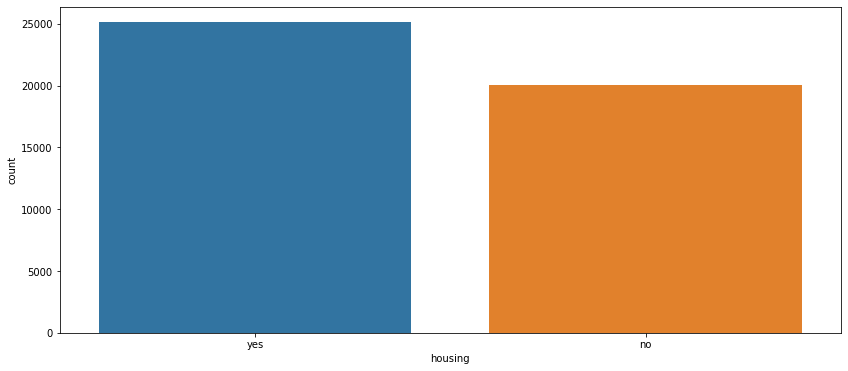

In [473]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['housing'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

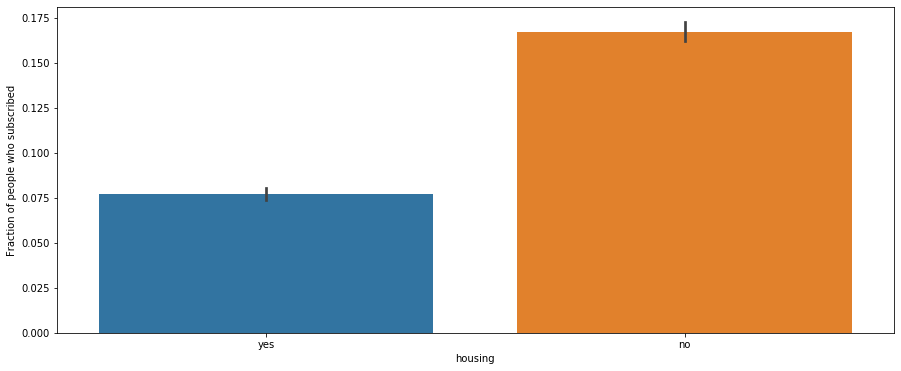

In [474]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='housing',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

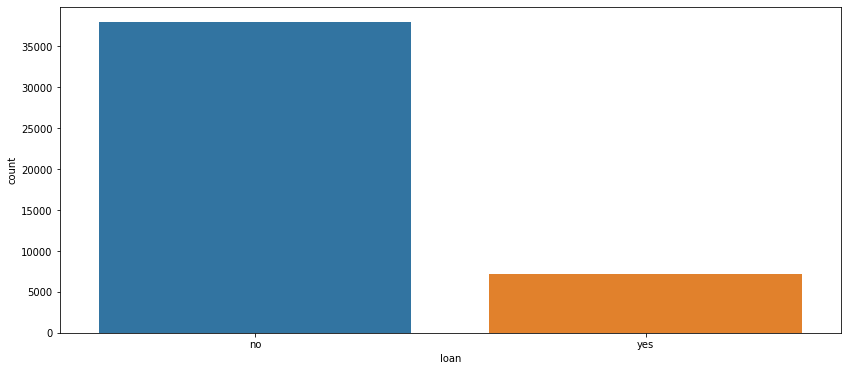

In [475]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['loan'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

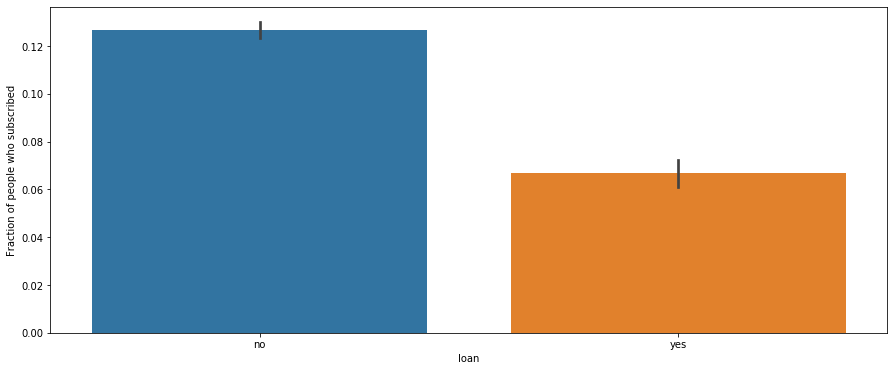

In [476]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='loan',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

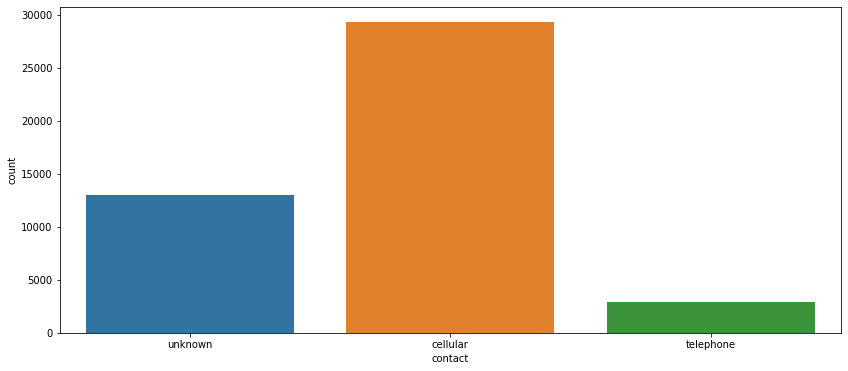

In [477]:
plt.figure(figsize=(14,6))
sns.countplot(df_bank['contact'])

[Text(0, 0.5, 'Fraction of people who subscribed')]

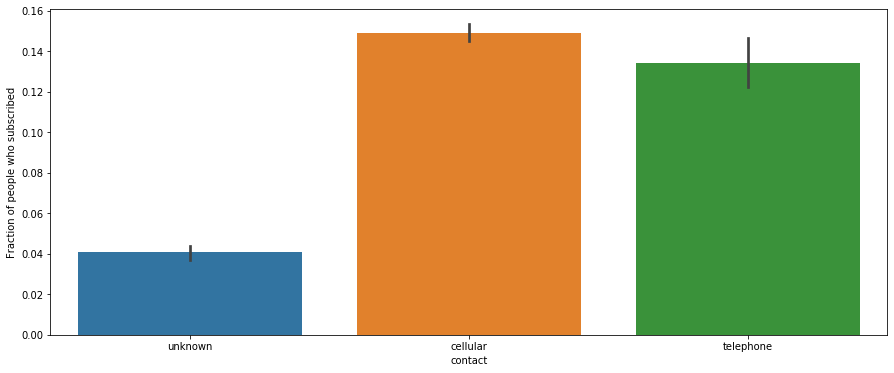

In [478]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='contact',y='Target',data=df_bank)
ax.set(ylabel='Fraction of people who subscribed')

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

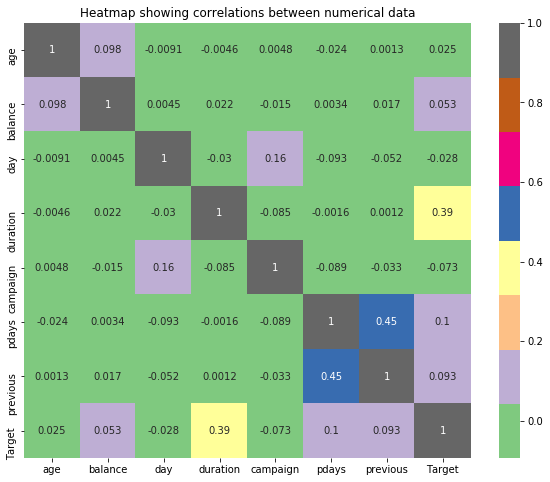

In [479]:
plt.figure(figsize=(10,8))  
sns.heatmap(df_bank.corr(),cmap='Accent',annot=True)
plt.title('Heatmap showing correlations between numerical data')

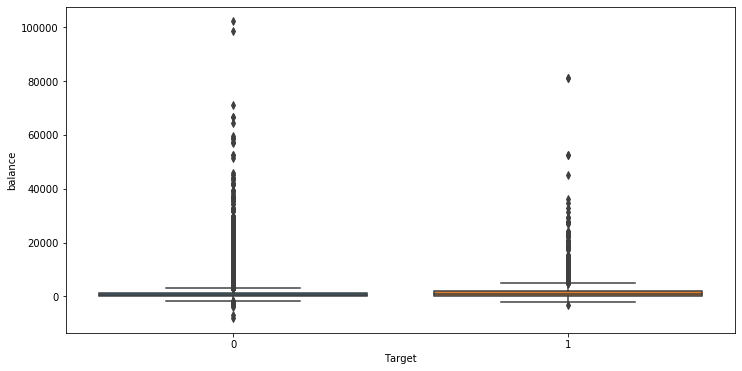

In [480]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="balance", data=df_bank)

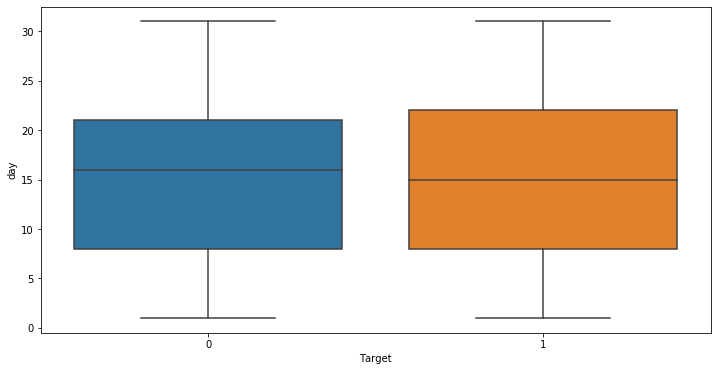

In [481]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="day", data=df_bank)

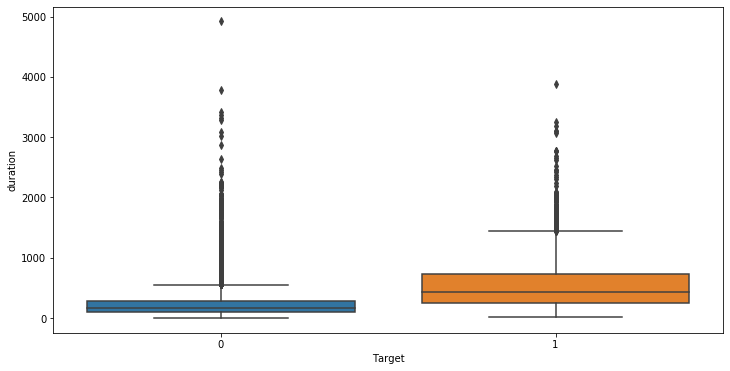

In [482]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="duration", data=df_bank)

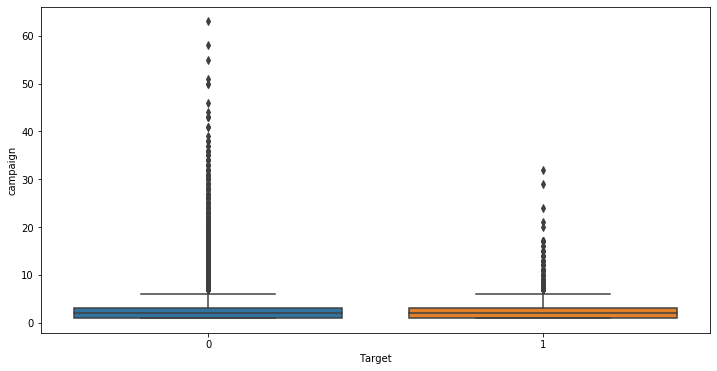

In [483]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="campaign", data=df_bank)

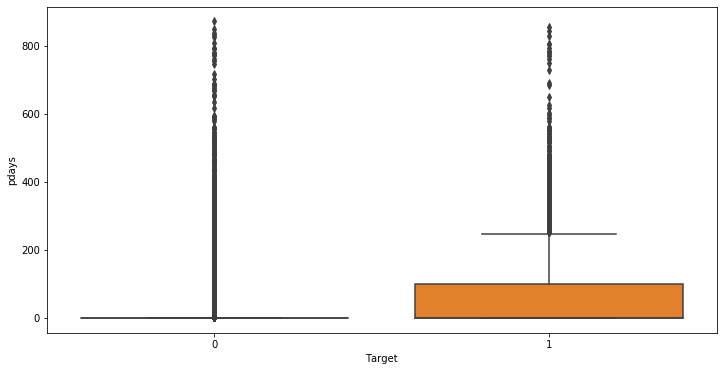

In [484]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="pdays", data=df_bank)

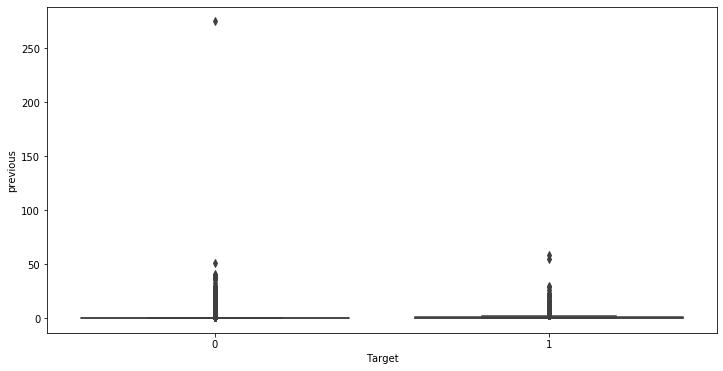

In [485]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="previous", data=df_bank)

<Figure size 864x432 with 0 Axes>

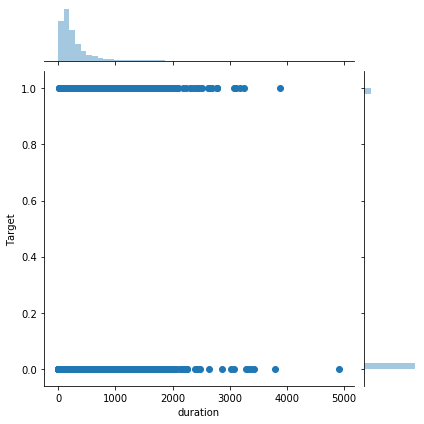

In [486]:
plt.figure(figsize=(12,6))
sns.jointplot(x=df_bank['duration'], y=df_bank['Target'])

In [487]:
df_bank[df_bank == 'unknown'].count()

D:\PGP-AIML\Python_Installation\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [45]:
# Replace all 'unknown' with NaNs.

df_bank = df_bank.applymap(lambda x: np.nan if x=='unknown' else x)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


In [46]:
# How many missing values are there in the dataset?

df_bank.isnull().sum(axis=0)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [47]:
# How many rows will be removed if I remove all the NaN's?

df_bank.shape[0] - df_bank.dropna(axis=0).shape[0] 

37369

In [48]:
# Replacing NaN values with the mode since the columns ar categorical

df_bank['job'] = df_bank['job'].fillna(df_bank['job'].mode()[0])
df_bank['education'] = df_bank['education'].fillna(df_bank['education'].mode()[0])
df_bank['contact'] = df_bank['contact'].fillna(df_bank['contact'].mode()[0])

### Analysis of 'Age'

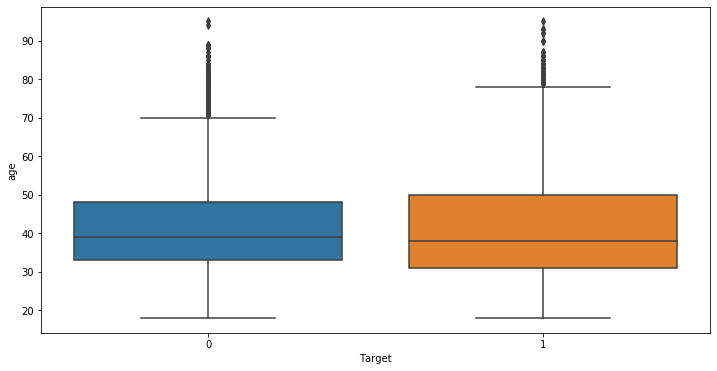

In [492]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Target", y="age", data=df_bank)

In [493]:
#Trying to find some strange values or null values
print('Min age: ', df_bank['age'].max())
print('Max age: ', df_bank['age'].min())
print('Null Values: ', df_bank['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


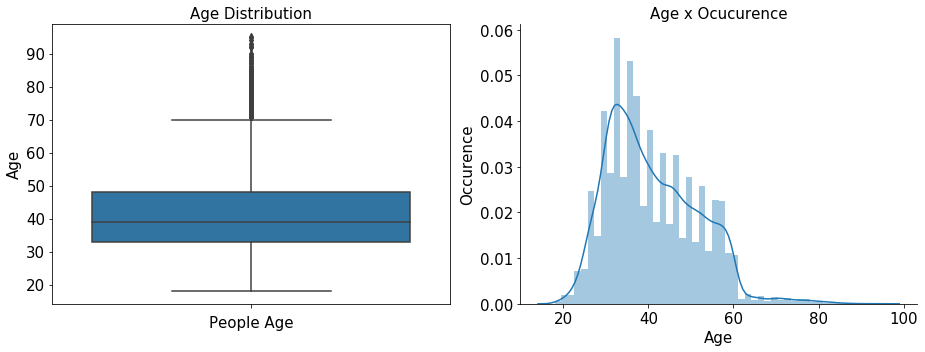

In [494]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df_bank, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_bank['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

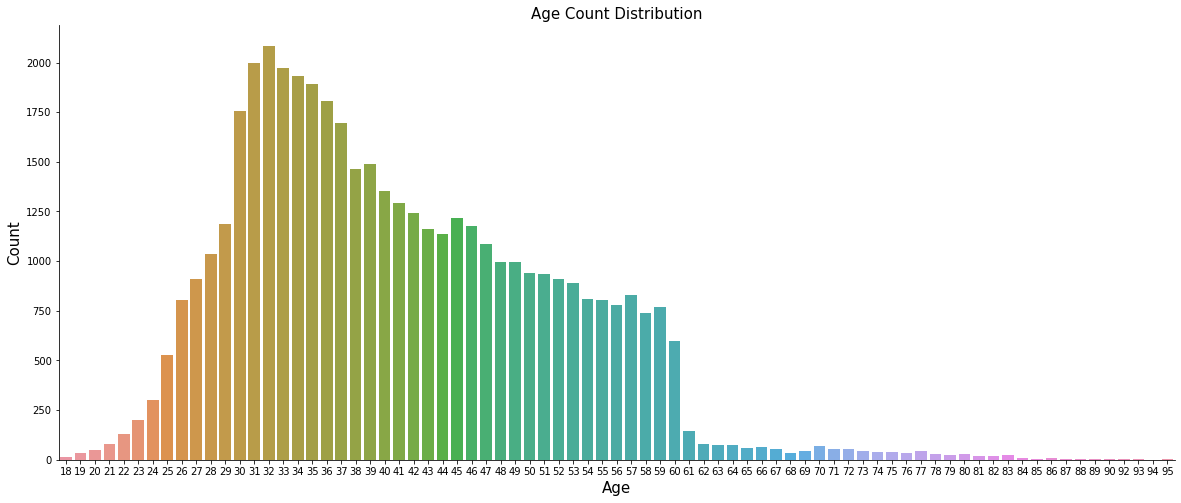

In [495]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df_bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [496]:
# Quartiles
print('1º Quartile: ', df_bank['age'].quantile(q = 0.25))
print('2º Quartile: ', df_bank['age'].quantile(q = 0.50))
print('3º Quartile: ', df_bank['age'].quantile(q = 0.75))
print('4º Quartile: ', df_bank['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', df_bank['age'].quantile(q = 0.75) + 
                      1.5*(df_bank['age'].quantile(q = 0.75) - df_bank['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [497]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(df_bank['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df_bank['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(df_bank['age'].std()*100/df_bank['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.9
STD : 10.6
CV  : 25.9 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them.

### Job

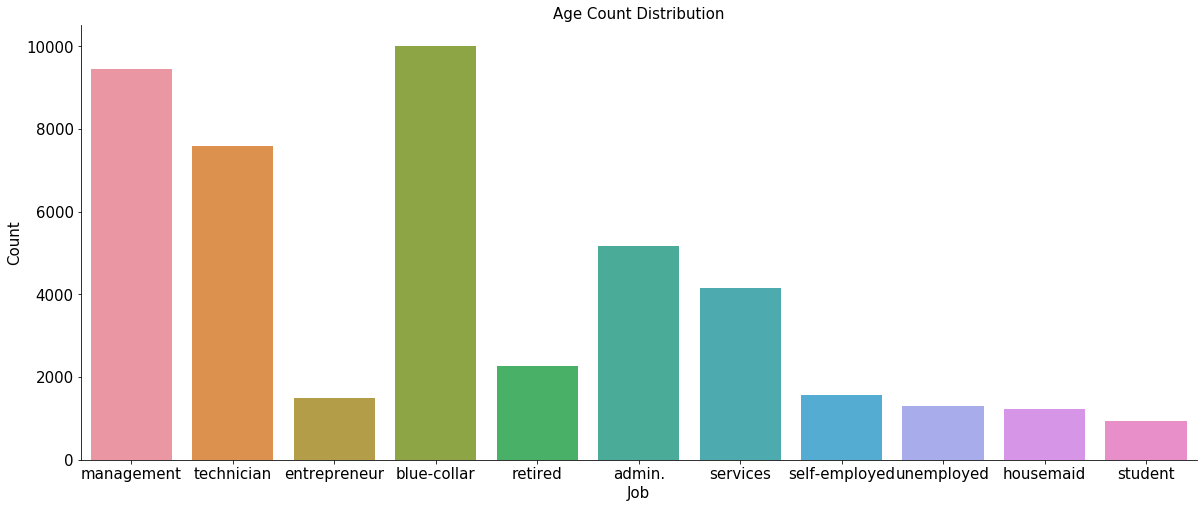

In [498]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df_bank)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Marital

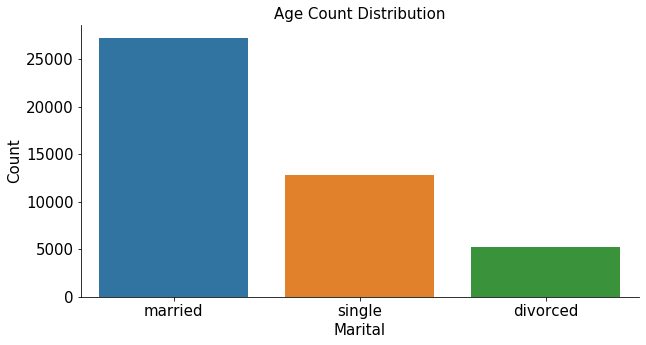

In [499]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df_bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Education

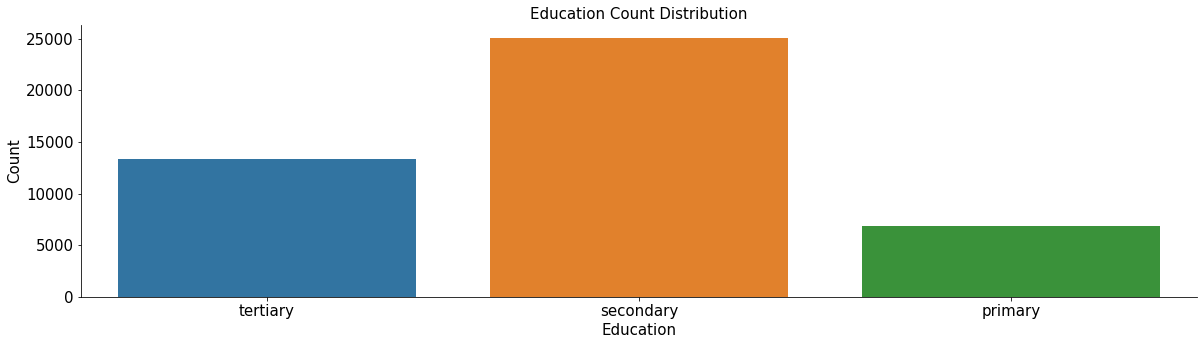

In [500]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df_bank)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Default, Housing, Loan

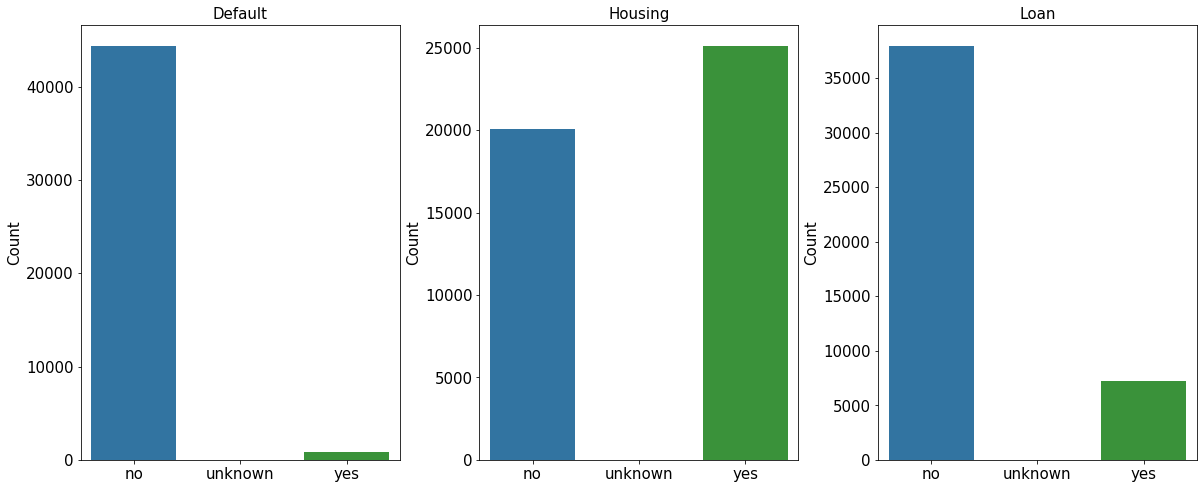

In [501]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df_bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df_bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df_bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [502]:
print('Default:\n No credit in default:'     , df_bank[df_bank['default'] == 'no']['age'].count(),
              '\n Unknown credit in default:', df_bank[df_bank['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , df_bank[df_bank['default'] == 'yes']['age'].count())

Default:
 No credit in default: 44396 
 Unknown credit in default: 0 
 Yes to credit in default: 815


In [503]:
print('Housing:\n No housing in loan:'     , df_bank[df_bank['housing'] == 'no']['age'].count(),
              '\n Unknown housing in loan:', df_bank[df_bank['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , df_bank[df_bank['housing'] == 'yes']['age'].count())

Housing:
 No housing in loan: 20081 
 Unknown housing in loan: 0 
 Yes to housing in loan: 25130


In [504]:
print('Housing:\n No to personal loan:'     , df_bank[df_bank['loan'] == 'no']['age'].count(),
              '\n Unknown to personal loan:', df_bank[df_bank['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , df_bank[df_bank['loan'] == 'yes']['age'].count())

Housing:
 No to personal loan: 37967 
 Unknown to personal loan: 0 
 Yes to personal loan: 7244


BANK CLIENTS CONCLUSION

The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

### Bank Client Categorical Treatment

In [49]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
df_bank['job']      = labelencoder_X.fit_transform(df_bank['job']) 
df_bank['marital']  = labelencoder_X.fit_transform(df_bank['marital']) 
df_bank['education']= labelencoder_X.fit_transform(df_bank['education']) 
df_bank['default']  = labelencoder_X.fit_transform(df_bank['default']) 
df_bank['housing']  = labelencoder_X.fit_transform(df_bank['housing']) 
df_bank['loan']     = labelencoder_X.fit_transform(df_bank['loan']) 

In [50]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_bank);
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,cellular,5,may,261,1,-1,0,NaN,0
1,2,9,2,1,0,29,1,0,cellular,5,may,151,1,-1,0,NaN,0
2,2,2,1,1,0,2,1,1,cellular,5,may,76,1,-1,0,NaN,0
3,2,1,1,1,0,1506,1,0,cellular,5,may,92,1,-1,0,NaN,0
4,2,1,2,1,0,1,0,0,cellular,5,may,198,1,-1,0,NaN,0


### Related with the last contact of the current campaign

In [507]:
print("Kind of Contact: \n", df_bank['contact'].unique())
print("\nWhich monthis this campaing work: \n", df_bank['month'].unique())
print("\nWhich days of week this campaing work: \n", df_bank['day'].unique())

Kind of Contact: 
 ['cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


### Duration

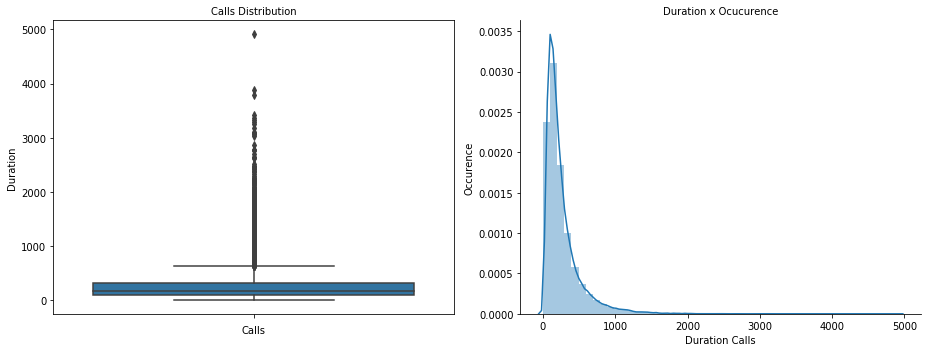

In [508]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df_bank, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df_bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [509]:
print("Max duration  call in minutes:  ", round((df_bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df_bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df_bank['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((df_bank['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [510]:
# Quartiles
print('1º Quartile: ', df_bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', df_bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', df_bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', df_bank['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', df_bank['duration'].quantile(q = 0.75) + 
                      1.5*(df_bank['duration'].quantile(q = 0.75) - df_bank['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [511]:
print('Numerber of outliers: ', df_bank[df_bank['duration'] > 643]['duration'].count())
print('Number of clients: ', len(df_bank))
#Outliers in %
print('Outliers are:', round(df_bank[df_bank['duration'] > 643]['duration'].count()*100/len(df_bank),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


In [512]:
df_bank[(df_bank['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,3,4,1,0,0,351,1,0,cellular,27,may,0,4,-1,0,NaN,0
22937,2,9,1,1,0,5535,0,0,cellular,26,aug,0,15,-1,0,NaN,0
36425,1,2,1,1,0,162,1,1,cellular,11,may,0,2,-1,0,NaN,0


### Contact, Month, Day of Week

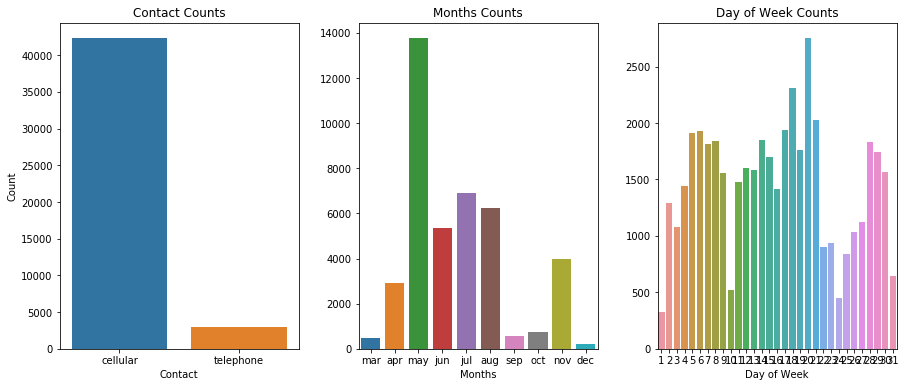

In [513]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_bank['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df_bank['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df_bank['day'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [514]:
print('Duration above: ', df_bank['duration'].quantile(q = 0.75) + 
                      1.5*(df_bank['duration'].quantile(q = 0.75) - df_bank['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [515]:
df_bank[df_bank['duration'] > 643].count()

age          3235
job          3235
marital      3235
education    3235
default      3235
balance      3235
housing      3235
loan         3235
contact      3235
day          3235
month        3235
duration     3235
campaign     3235
pdays        3235
previous     3235
poutcome      529
Target       3235
dtype: int64

### Contact, Month, Day of Week treatment

In [51]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
df_bank['contact']     = labelencoder_X.fit_transform(df_bank['contact']) 
df_bank['month']       = labelencoder_X.fit_transform(df_bank['month']) 

In [52]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 643), 'duration'] = 4
    data.loc[data['duration']  > 643, 'duration'] = 5

    return data
duration(df_bank);
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,0,5,8,3,1,-1,0,NaN,0
1,2,9,2,1,0,29,1,0,0,5,8,2,1,-1,0,NaN,0
2,2,2,1,1,0,2,1,1,0,5,8,1,1,-1,0,NaN,0
3,2,1,1,1,0,1506,1,0,0,5,8,1,1,-1,0,NaN,0
4,2,1,2,1,0,1,0,0,0,5,8,3,1,-1,0,NaN,0


In [53]:
df_bank['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [54]:
df_bank['poutcome'].replace(['failure', 'other', 'success'], [1,2,3], inplace  = True)
df_bank['poutcome'] = df_bank['poutcome'].fillna(1)

## Model

In [55]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,0,5,8,3,1,-1,0,1.0,0
1,2,9,2,1,0,29,1,0,0,5,8,2,1,-1,0,1.0,0
2,2,2,1,1,0,2,1,1,0,5,8,1,1,-1,0,1.0,0
3,2,1,1,1,0,1506,1,0,0,5,8,1,1,-1,0,1.0,0
4,2,1,2,1,0,1,0,0,0,5,8,3,1,-1,0,1.0,0


In [56]:
df_bank.shape

(45211, 17)

In [57]:
# Income is dropped from X because it is the target variable.
# Education is dropped because it is already label-encoded in education.num. 
# One can notice the high correlation between education and education.num in the heatmap.
# Native country is dropped because it also showed not much co-relation.
# fnlwgt is dropped because it has no correlation with income.

# Define X and Y variables

# Task 6: Prepare/preprocess the data to train any given ML model

y = df_bank.Target
X = df_bank.drop(['Target'],axis=1)

In [58]:
X.shape

(45211, 16)

In [59]:
y.shape

(45211,)

In [60]:
# Split into training(70%) and test set(30%)
# Task 7: Split the data into train and test set. test set size = 30% of the original combined data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

### Defining some custom functions

In [14]:
# Defining grid search function

def grid_search(clf, parameters, X, y, n_jobs= -1, n_folds=4, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func,verbose =2)
    else:
        print('Doing grid search')
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose =1)
    gs.fit(X, y)
    print("mean test score (weighted by split size) of CV rounds: ",gs.cv_results_['mean_test_score'] )
    print ("Best parameter set", gs.best_params_, "Corresponding mean CV score",gs.best_score_)
    best = gs.best_estimator_
    return best

In [15]:
# Defining show_classifier_metrics function for better visualization of data

def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train))*100))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

In [16]:
# Defining get_results function for making the final results dataframe for each model

def get_results(y_test=y_test, y_pred=y_pred):
    df_table = confusion_matrix(y_test,y_pred)
    a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f = (2 * p * r) / (p + r)

    print("Accuracy : ",round(a,2))
    print("Precision: ",round(p,2))
    print("Recall   : ",round(r,2))
    print("F1 score : ",round(f,2))
    return a,p,r,f

### Logistic Regression

In [61]:
param = {
'C': [3,5,10], 
'verbose': [1],
    'max_iter': [100,200,500,700]
}   
logreg = LogisticRegression(random_state=123)
logreg_grid = grid_search(logreg, param, X_train,y_train, n_folds=3)

Doing grid search
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   49.8s finished
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]mean test score (weighted by split size) of CV rounds:  [0.89664107 0.89664107 0.89664107 0.89664107 0.89667267 0.89667267
 0.89667267 0.89667267 0.89654628 0.89654628 0.89654628 0.89654628]
Best parameter set {'C': 5, 'max_iter': 100, 'verbose': 1} Corresponding mean CV score 0.8966726703952981


In [62]:
logreg_grid.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [63]:
y_pred = logreg_grid.predict(X_test)

In [64]:
show_classifier_metrics(logreg_grid)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)
confusion matrix of training data
[[26564  1381]
 [ 3510   192]]
confusion matrix of test data
[[11412   565]
 [ 1520    67]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11977
           1       0.11      0.04      0.06      1587

    accuracy                           0.85     13564
   macro avg       0.49      0.50      0.49     13564
weighted avg       0.79      0.85      0.82     13564

Accuracy on test data: 84.628428%
Accuracy on training data: 84.545139%
Area under the ROC curve : 0.497522


In [65]:
a_lr,p_lr,r_lr,f_lr = get_results(y_test,y_pred)

Accuracy :  0.89
Precision:  0.6
Recall   :  0.24
F1 score :  0.34


### Nave Bayes

In [66]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
print(NBmodel)

# make predictions
expected = y_test
predicted = NBmodel.predict(X_test)

# summarize the fit of the model
show_classifier_metrics(NBmodel,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[26037  1887]
 [ 2442  1281]]
confusion matrix of test data
[[10766  1211]
 [ 1422   165]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11977
           1       0.12      0.10      0.11      1587

    accuracy                           0.81     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.79      0.81      0.80     13564

Accuracy on test data: 80.588322%
Accuracy on training data: 86.320978%
Area under the ROC curve : 0.501430


In [67]:
a_nb,p_nb,r_nb,f_nb = get_results(y_test,predicted)

Accuracy :  0.86
Precision:  0.38
Recall   :  0.33
F1 score :  0.35


### KNN

k=1 83.88 (+/- 0.25)
k=2 88.09 (+/- 0.38)
k=3 87.00 (+/- 0.39)
k=4 88.22 (+/- 0.49)
k=5 87.83 (+/- 0.44)
k=6 88.30 (+/- 0.50)
k=7 88.12 (+/- 0.53)
k=8 88.33 (+/- 0.55)
k=9 88.21 (+/- 0.54)
k=10 88.33 (+/- 0.54)
k=11 88.31 (+/- 0.46)
k=12 88.35 (+/- 0.44)
k=13 88.30 (+/- 0.41)
k=14 88.32 (+/- 0.45)
k=15 88.24 (+/- 0.43)
k=16 88.27 (+/- 0.44)
k=17 88.16 (+/- 0.43)
k=18 88.29 (+/- 0.45)
k=19 88.27 (+/- 0.43)
k=20 88.34 (+/- 0.49)
The optimal number of neighbors is 11 with 88.3%


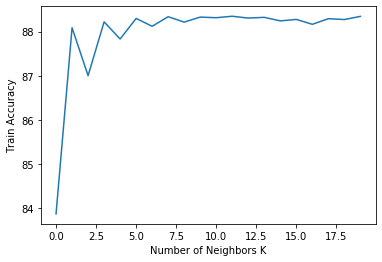

In [537]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_bank, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [538]:
# Using k=11 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
show_classifier_metrics(knn,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
confusion matrix of training data
[[27688   221]
 [ 3348   390]]
confusion matrix of test data
[[11861   152]
 [ 1433   118]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     12013
           1       0.44      0.08      0.13      1551

    accuracy                           0.88     13564
   macro avg       0.66      0.53      0.53     13564
weighted avg       0.84      0.88      0.85     13564

Accuracy on test data: 88.314656%
Accuracy on training data: 88.722470%
Area under the ROC curve : 0.531713


In [539]:
a_knn,p_knn,r_knn,f_knn = get_results(y_test,y_pred)

Accuracy :  0.88
Precision:  0.44
Recall   :  0.08
F1 score :  0.13


### SVM

In [545]:
svc = SVC(random_state = 123)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

# Not scaling further as this model is not overfit

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.97
Accuracy on test set: 0.89


In [546]:
y_pred = svc.predict(X_test)

In [547]:
show_classifier_metrics(svc,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)
confusion matrix of training data
[[27909     0]
 [ 1069  2669]]
confusion matrix of test data
[[12012     1]
 [ 1546     5]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.83      0.00      0.01      1551

    accuracy                           0.89     13564
   macro avg       0.86      0.50      0.47     13564
weighted avg       0.88      0.89      0.83     13564

Accuracy on test data: 88.594810%
Accuracy on training data: 96.622113%
Area under the ROC curve : 0.501570


In [548]:
a_svc,p_svc,r_svc,f_svc = get_results(y_test,y_pred)

Accuracy :  0.89
Precision:  0.83
Recall   :  0.0
F1 score :  0.01


### Decision Tree

In [554]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state = 123)
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

show_classifier_metrics(dtree,y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
confusion matrix of training data
[[27128   781]
 [ 2391  1347]]
confusion matrix of test data
[[11667   346]
 [ 1001   550]]
classification report of test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.61      0.35      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Accuracy on test data: 90.069301%
Accuracy on training data: 89.976933%
Area under the ROC curve : 

In [550]:
a_dt,p_dt,r_dt,f_dt = get_results(y_test,dtreepred)

Accuracy :  0.9
Precision:  0.61
Recall   :  0.35
F1 score :  0.45


### Random Forest

In [551]:
rfc = RandomForestClassifier(n_estimators = 200,criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state=123)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

show_classifier_metrics(rfc,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 0.5},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
confusion matrix of training data
[[27765   144]
 [ 3143   595]]
confusion matrix of test data
[[11937    76]
 [ 1299   252]]
classification report of test data
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12013
           1       0.77      0.16      0.27      1551

    accuracy                           0.90     13564
   macro avg       0.84      0.58      0.61     13564
weighted avg       0.89      0.90      0.87     13564

Accuracy on t

In [552]:
a_rf,p_rf,r_rf,f_rf = get_results(y_test,rfcpred)

Accuracy :  0.9
Precision:  0.77
Recall   :  0.16
F1 score :  0.27


### XG Boost

In [32]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

show_classifier_metrics(xgb,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
confusion matrix of training data
[[27302   607]
 [ 2448  1290]]
confusion matrix of test data
[[11716   297]
 [ 1051   500]]
classification report of test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.32      0.43      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

Accuracy on test data: 90.061929%
Accuracy on training data: 90.346636%
Area under the ROC curve : 0.648825


In [97]:
a_xgb,p_xgb,r_xgb,f_xgb = get_results(y_test,xgbprd)

### Gradient descent Boosting

In [553]:
gbk = GradientBoostingClassifier(random_state = 123)
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

show_classifier_metrics(gbk,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
confusion matrix of training data
[[27218   691]
 [ 2307  1431]]
confusion matrix of test data
[[11670   343]
 [  992   559]]
classification report of test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.36      0.46      1551



In [555]:
params ={'max_depth' : [3,5,8], 'min_samples_leaf' : [3,5,7,10] }
gradboost_model_gridsearch = GridSearchCV(gbk, param_grid = params, scoring = 'accuracy', cv = 10)
gradboost_model_gridsearch.fit(X_train, y_train)
gradboost_model_gridsearch.score(X_train, y_train)
gradboost_model_gridsearch.score(X_test, y_test)
y_predict = gradboost_model_gridsearch.predict(X_test)
show_classifier_metrics(gradboost_model_gridsearch,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [556]:
a_gdb,p_gdb,r_gdb,f_gdb = get_results(y_test,y_predict)

Accuracy :  0.9
Precision:  0.62
Recall   :  0.41
F1 score :  0.49


### Bagging

In [557]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL

bc_model = BaggingClassifier(n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state =123)
bc_model.fit(X_train, y_train)
bc_model.score(X_train, y_train)

0.9965557556798432

In [558]:
bcpred = bc_model.predict(X_test)

show_classifier_metrics(bc_model,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=123, verbose=0,
                  warm_start=False)
confusion matrix of training data
[[27904     5]
 [  104  3634]]
confusion matrix of test data
[[11529   484]
 [  892   659]]
classification report of test data
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     12013
           1       0.58      0.42      0.49      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

Accuracy on test data: 89.855500%
Accuracy on training data: 99.655576%
Area under the ROC curve : 0.692299


In [559]:
a_bb,p_bb,r_bb,f_bb = get_results(y_test,bcpred)

Accuracy :  0.9
Precision:  0.58
Recall   :  0.42
F1 score :  0.49


### AdaBoosting

In [560]:
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=50,random_state=123)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [561]:
test_pred = abcl.predict(X_test)
abcl.score(X_test, y_test)

show_classifier_metrics(abcl,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.5,
                                                                       1: 0.5},
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                      

In [562]:
a_adb,p_adb,r_adb,f_adb = get_results(y_test,test_pred)

Accuracy :  0.89
Precision:  0.52
Recall   :  0.44
F1 score :  0.48


### Score of Model Type 1

In [563]:
df_tempresults = pd.DataFrame({'ModelName':['LR','NB','KNN','SVM','DT','RF','GDB','XGB','ADB','Bagging'], 
                                'Accuracy':[a_lr,a_nb,a_knn,a_svc,a_dt,a_rf,a_gdb,a_xgb,a_adb,a_bb], 
                                'Recall':[r_lr,r_nb,r_knn,r_svc,r_dt,r_rf,r_gdb,r_xgb,r_adb,r_bb],
                                'Precision':[p_lr,p_nb,p_knn,p_svc,p_dt,p_rf,p_gdb,p_xgb,p_adb,p_bb]})
df_tempresults

,ModelName,Accuracy,Recall,Precision
0,LR,0.896564,0.259188,0.612805
1,NB,0.858817,0.330754,0.369065
2,KNN,0.883147,0.076080,0.437037
3,SVM,0.885948,0.003224,0.833333
4,DT,0.900693,0.354610,0.613839
5,RF,0.898629,0.162476,0.768293
6,GDB,0.903495,0.411348,0.617021
7,XGB,0.900619,0.650000,0.770000
8,ADB,0.890150,0.436493,0.523589
9,Bagging,0.898555,0.424887,0.576553


## Model Type 2

In [2]:
df_bank2 = pd.read_csv("bank-full.csv")
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bank2['Target'] = df_bank2['Target'].apply(lambda inc: 0 if inc == "no" else 1) 
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [4]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


D:\PGP-AIML\Python_Installation\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\PGP-AIML\Python_Installation\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


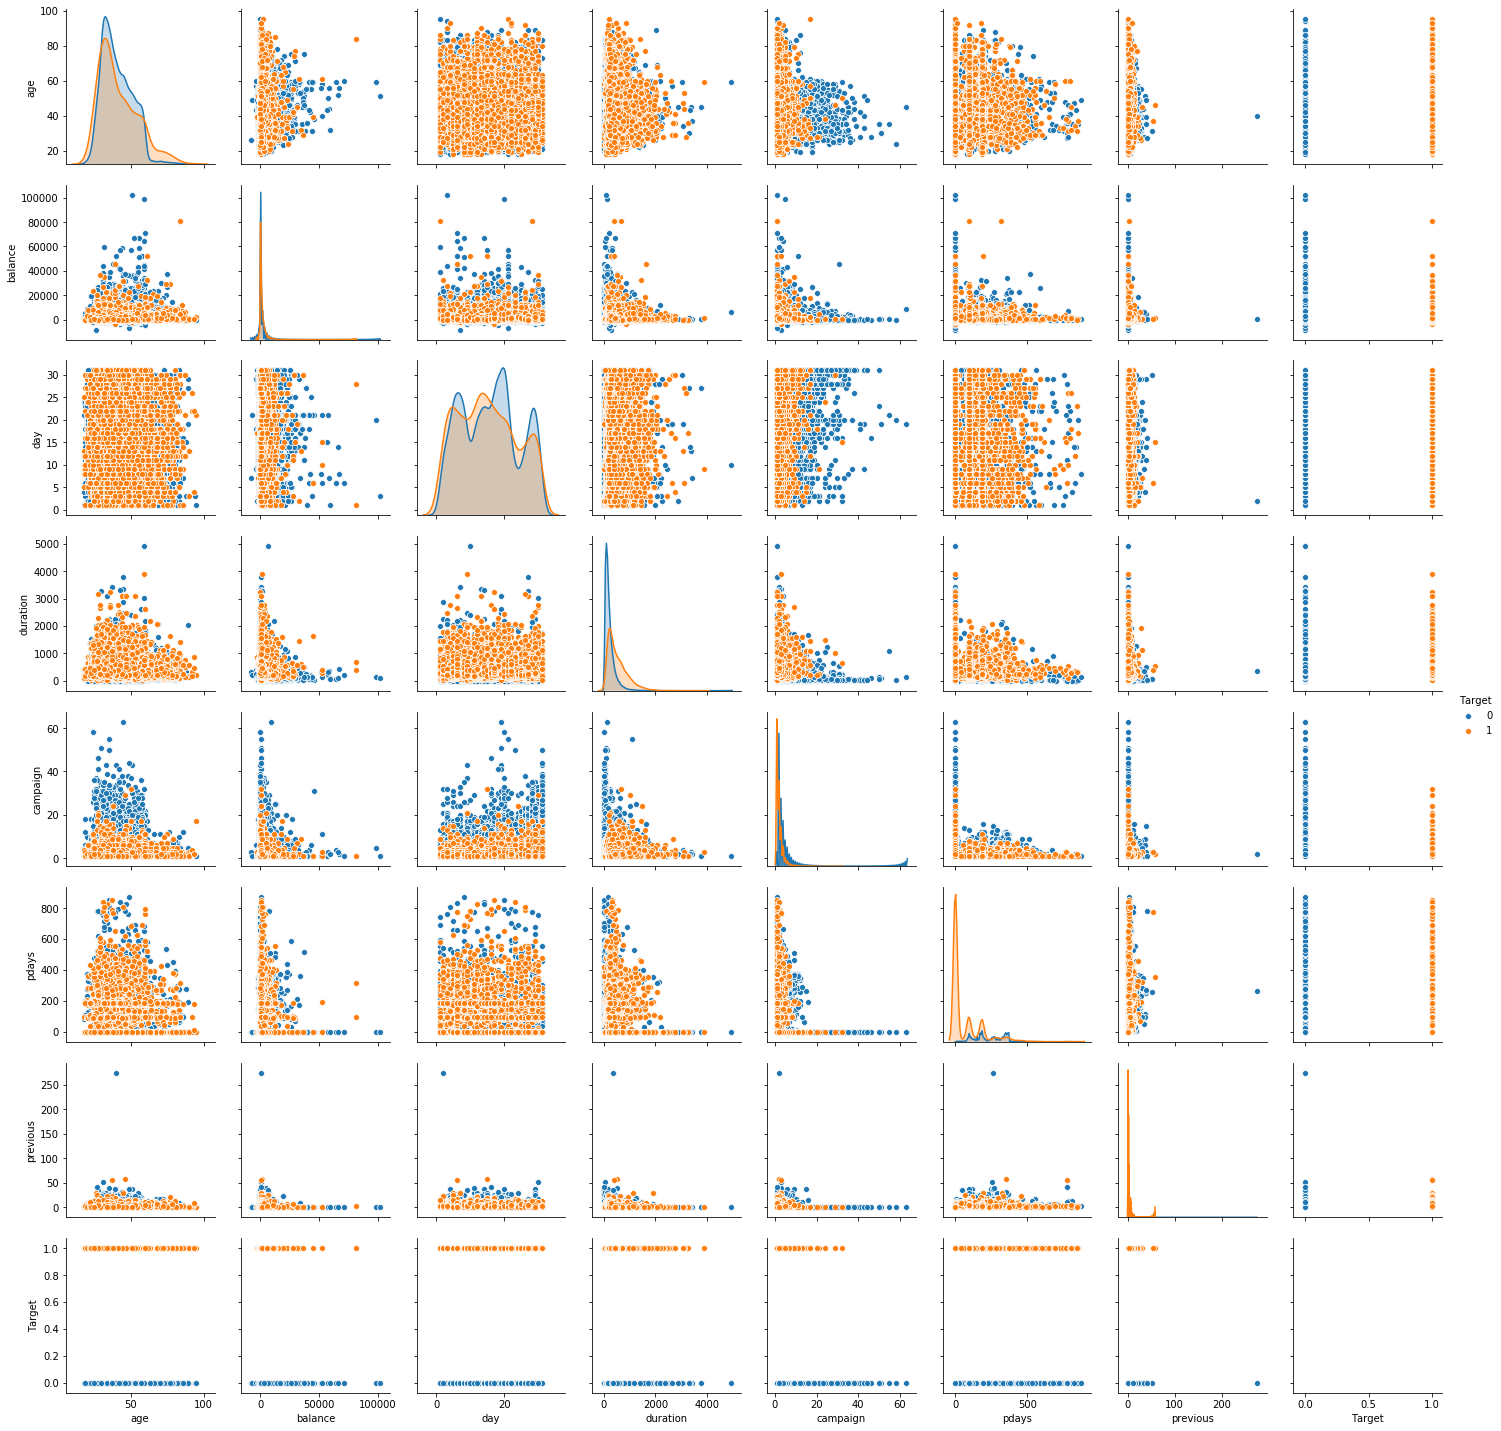

In [579]:
sns.pairplot(df_bank2, diag_kind ='kde', hue='Target')

In [5]:
le = LabelEncoder()
# apply le on categorical feature columns
df_bank2['job']      = le.fit_transform(df_bank2['job']) 
df_bank2['marital']  = le.fit_transform(df_bank2['marital']) 
df_bank2['education']= le.fit_transform(df_bank2['education']) 
df_bank2['default']  = le.fit_transform(df_bank2['default']) 
df_bank2['housing']  = le.fit_transform(df_bank2['housing']) 
df_bank2['loan']     = le.fit_transform(df_bank2['loan']) 
df_bank2['contact']  = le.fit_transform(df_bank2['contact']) 
df_bank2['month']    = le.fit_transform(df_bank2['month']) 
df_bank2['poutcome'] = le.fit_transform(df_bank2['poutcome']) 

In [6]:
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [7]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int64
dtypes: int32(9), int64(8)
memory usage: 4.3 MB


In [8]:
#Applying z-score transformation to standadize as well as normalize our dataset
df_bank2_labels = df_bank2["Target"]
df_bank2 = df_bank2.drop(["Target"] , axis = 1)
df_bank2 = df_bank2.apply(zscore)  # convert all attributes to Z scale 

df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [9]:
#Assign X and Y
y = df_bank2_labels
X = df_bank2

In [10]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


### Logistic Regression

In [587]:
logreg2 = LogisticRegression(random_state=70)
logreg_grid2 = grid_search(logreg2, param, X_train,y_train, n_folds=3)

logreg_grid2.fit(X_train, y_train)
y_pred = logreg_grid2.predict(X_test)
show_classifier_metrics(logreg_grid2)

Doing grid search
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.7min finished
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]mean test score (weighted by split size) of CV rounds:  [0.89085853 0.89085853 0.89085853 0.89085853 0.89089013 0.89089013
 0.89089013 0.89089013 0.89089013 0.89089013 0.89089013 0.89089013]
Best parameter set {'C': 5, 'max_iter': 100, 'verbose': 1} Corresponding mean CV score 0.8908901317660441
[LibLinear]

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=70, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)
confusion matrix of training data
[[26747  1162]
 [ 3571   167]]
confusion matrix of test data
[[11523   490]
 [ 1492    59]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12013
           1       0.11      0.04      0.06      1551

    accuracy                           0.85     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.80      0.85      0.82     13564

Accuracy on test data: 85.387791%
Accuracy on training data: 85.044396%
Area under the ROC curve : 0.498625


In [588]:
a_lr2,p_lr2,r_lr2,f_lr2 = get_results(y_test,y_pred)

Accuracy :  0.89
Precision:  0.6
Recall   :  0.21
F1 score :  0.31


### Nave Bayes

In [590]:
NBmodel2 = GaussianNB()
NBmodel2.fit(X_train, y_train)
print(NBmodel2)

# make predictions
expected = y_test
predicted = NBmodel2.predict(X_test)

# summarize the fit of the model
show_classifier_metrics(NBmodel2,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[24687  3258]
 [ 1898  1804]]
confusion matrix of test data
[[10137  1876]
 [ 1285   266]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     12013
           1       0.12      0.17      0.14      1551

    accuracy                           0.77     13564
   macro avg       0.51      0.51      0.50     13564
weighted avg       0.80      0.77      0.78     13564

Accuracy on test data: 76.695665%
Accuracy on training data: 83.707776%
Area under the ROC curve : 0.507669


In [591]:
a_nb2,p_nb2,r_nb2,f_nb2 = get_results(y_test,predicted)

Accuracy :  0.84
Precision:  0.36
Recall   :  0.49
F1 score :  0.41


### KNN

k=1 87.49 (+/- 0.51)
k=2 88.95 (+/- 0.60)
k=3 88.96 (+/- 0.52)
k=4 89.18 (+/- 0.55)
k=5 89.30 (+/- 0.64)
k=6 89.35 (+/- 0.64)
k=7 89.42 (+/- 0.67)
k=8 89.40 (+/- 0.69)
k=9 89.52 (+/- 0.65)
k=10 89.49 (+/- 0.53)
k=11 89.57 (+/- 0.55)
k=12 89.46 (+/- 0.52)
k=13 89.60 (+/- 0.52)
k=14 89.52 (+/- 0.56)
k=15 89.59 (+/- 0.52)
k=16 89.53 (+/- 0.54)
k=17 89.65 (+/- 0.50)
k=18 89.52 (+/- 0.58)
k=19 89.60 (+/- 0.58)
k=20 89.55 (+/- 0.61)
The optimal number of neighbors is 16 with 89.6%


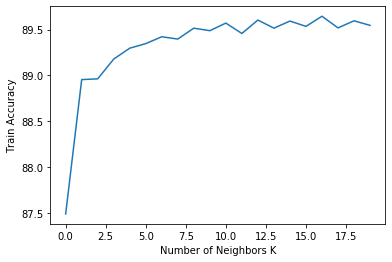

In [12]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_bank2, y, test_size = 0.2, random_state = 70)

#Neighbors
neighbors = np.arange(0,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=70)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [17]:
# Using k=16 as the final model for prediction
knn2 = KNeighborsClassifier(n_neighbors = 16)

# fitting the model
knn2.fit(X_train, y_train)

# predict the response
y_pred = knn2.predict(X_test)

# evaluate accuracy
show_classifier_metrics(knn2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')
confusion matrix of training data
[[27611   334]
 [ 2782   920]]
confusion matrix of test data
[[11794   183]
 [ 1239   348]]
classification report of test data
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.66      0.22      0.33      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.60      0.64     13564
weighted avg       0.88      0.90      0.87     13564

Accuracy on test data: 89.516367%
Accuracy on training data: 90.153885%
Area under the ROC curve : 0.602001


In [18]:
a_knn2,p_knn2,r_knn2,f_knn2 = get_results(y_test,y_pred)

Accuracy :  0.9
Precision:  0.66
Recall   :  0.22
F1 score :  0.33


### SVM

In [168]:
svc2 = SVC(random_state = 70)
svc2.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test, y_test)))

# Not scaling further as this model is not overfit

y_pred = svc2.predict(X_test)

show_classifier_metrics(svc2,y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.91
Accuracy on test set: 0.90
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
confusion matrix of training data
[[27568   377]
 [ 2577  1125]]
confusion matrix of test data
[[11494   519]
 [ 1473    78]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12013
           1       0.13      0.05      0.07      1551

    accuracy                           0.85     13564
   macro avg       0.51      0.50      0.50     13564
weighted avg       0.80      0.85      0.82     13564

Accuracy on test data: 85.314067%
Accuracy on training data: 90.665782%
Area under the ROC curve : 0.503543


In [169]:
a_svc2,p_svc2,r_svc2,f_svc2 = get_results(y_test,y_pred)

Accuracy :  0.9
Precision:  0.68
Recall   :  0.26
F1 score :  0.37


### Decision Tree

In [21]:
dtree2 = DecisionTreeClassifier(criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state=70)
dtree2.fit(X_train, y_train)
dtreepred = dtree2.predict(X_test)

show_classifier_metrics(dtree2,y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=70, splitter='best')
confusion matrix of training data
[[27181   764]
 [ 2288  1414]]
confusion matrix of test data
[[11642   335]
 [ 1022   565]]
classification report of test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11977
           1       0.63      0.36      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Accuracy on test data: 89.995577%
Accuracy on training data: 90.356116%
Area under the ROC curve : 0

In [22]:
a_dt2,p_dt2,r_dt2,f_dt2 = get_results(y_test,dtreepred)

Accuracy :  0.9
Precision:  0.63
Recall   :  0.36
F1 score :  0.45


### Random Forest

In [24]:
rfc2 = RandomForestClassifier(n_estimators = 200,criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state=70)
rfc2.fit(X_train, y_train)
rfcpred = rfc2.predict(X_test)

show_classifier_metrics(rfc2,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 0.5},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=70, verbose=0, warm_start=False)
confusion matrix of training data
[[27832   113]
 [ 3213   489]]
confusion matrix of test data
[[11927    50]
 [ 1389   198]]
classification report of test data
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     11977
           1       0.80      0.12      0.22      1587

    accuracy                           0.89     13564
   macro avg       0.85      0.56      0.58     13564
weighted avg       0.88      0.89      0.86     13564

Accuracy on te

In [25]:
a_rf2,p_rf2,r_rf2,f_rf2 = get_results(y_test,rfcpred)

Accuracy :  0.89
Precision:  0.8
Recall   :  0.12
F1 score :  0.22


### Gradient Descent Boosting

In [26]:
gbk2 = GradientBoostingClassifier(random_state = 70)
gbk2.fit(X_train, y_train)
gbkpred = gbk2.predict(X_test)

show_classifier_metrics(gbk2,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=70, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
confusion matrix of training data
[[27276   669]
 [ 2152  1550]]
confusion matrix of test data
[[11642   335]
 [  956   631]]
classification report of test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.40      0.49      1587

 

In [27]:
a_gdb2,p_gdb2,r_gdb2,f_gdb2 = get_results(y_test,gbkpred)

Accuracy :  0.9
Precision:  0.65
Recall   :  0.4
F1 score :  0.49


### Bagging

In [28]:
bc_model2 = BaggingClassifier(n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state = 70)
bc_model2.fit(X_train, y_train)
bc_model2.score(X_train, y_train)
bcpred = bc_model2.predict(X_test)

show_classifier_metrics(bc_model2,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=70, verbose=0,
                  warm_start=False)
confusion matrix of training data
[[27943     2]
 [   79  3623]]
confusion matrix of test data
[[11538   439]
 [  853   734]]
classification report of test data
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.63      0.46      0.53      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.90      0.90      0.90     13564

Accuracy on test data: 90.474786%
Accuracy on training data: 99.744052%
Area under the ROC curve : 0.712927


In [29]:
a_bb2,p_bb2,r_bb2,f_bb2 = get_results(y_test,bcpred)

Accuracy :  0.9
Precision:  0.63
Recall   :  0.46
F1 score :  0.53


### AdaBoosting

In [31]:
abcl2 = AdaBoostClassifier(base_estimator=dtree2, n_estimators=50, random_state = 70)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl2 = abcl2.fit(X_train, y_train)

test_pred = abcl2.predict(X_test)
abcl2.score(X_test, y_test)

show_classifier_metrics(abcl2,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.5,
                                                                       1: 0.5},
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                      

In [32]:
a_adb2,p_adb2,r_adb2,f_adb2 = get_results(y_test,test_pred)

Accuracy :  0.9
Precision:  0.57
Recall   :  0.49
F1 score :  0.53


### Score of Model Type 2

In [181]:
df_tempresults2 = pd.DataFrame({'ModelName':['LR','NB','KNN','SVM','DT','RF','GDB','ADB','Bagging'], 
                                'Accuracy':[a_lr2,a_nb2,a_knn2,a_svc2,a_dt2,a_rf2,a_gdb2,a_adb2,a_bb2], 
                                'Recall':[r_lr2,r_nb2,r_knn2,r_svc2,r_dt2,r_rf2,r_gdb2,r_adb2,r_bb2],
                                'Precision':[p_lr2,p_nb2,p_knn2,p_svc2,p_dt2,p_rf2,p_gdb2,p_adb2,p_bb2]})
df_tempresults2

,ModelName,Accuracy,Recall,Precision
0,LR,0.890740,0.206049,0.595628
1,NB,0.838764,0.485822,0.359944
2,KNN,0.895901,0.280403,0.622378
3,SVM,0.899145,0.257089,0.683417
4,DT,0.874668,0.500315,0.466784
5,RF,0.908065,0.427851,0.666994
6,GDB,0.904822,0.397606,0.653209
7,ADB,0.872973,0.487713,0.459620
8,Bagging,0.903421,0.448015,0.620961


# Model Type 3

In [33]:
df_bank3 = pd.read_csv("bank-full.csv")
df_bank3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
df_bank3['Target'] = df_bank3['Target'].apply(lambda inc: 0 if inc == "no" else 1) 

In [35]:
le = LabelEncoder()
# apply le on categorical feature columns
df_bank3['job']      = le.fit_transform(df_bank3['job']) 
df_bank3['marital']  = le.fit_transform(df_bank3['marital']) 
df_bank3['education']= le.fit_transform(df_bank3['education']) 
df_bank3['default']  = le.fit_transform(df_bank3['default']) 
df_bank3['housing']  = le.fit_transform(df_bank3['housing']) 
df_bank3['loan']     = le.fit_transform(df_bank3['loan']) 
df_bank3['contact']  = le.fit_transform(df_bank3['contact']) 
df_bank3['month']    = le.fit_transform(df_bank3['month']) 
df_bank3['poutcome'] = le.fit_transform(df_bank3['poutcome']) 

In [36]:
scaler = StandardScaler()
df_bank3 = scaler.fit_transform(df_bank3)

#Scaling the data to be of uniform scale as there is huge imbalance in the scale as well as the data.

In [37]:
df_bank3 = pd.DataFrame(df_bank3)

In [38]:
df_bank3.columns =['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','Target']
df_bank3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


In [39]:
df_bank3["Target"]= df_bank3["Target"].astype(int) 
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null float64
marital      45211 non-null float64
education    45211 non-null float64
default      45211 non-null float64
balance      45211 non-null float64
housing      45211 non-null float64
loan         45211 non-null float64
contact      45211 non-null float64
day          45211 non-null float64
month        45211 non-null float64
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
poutcome     45211 non-null float64
Target       45211 non-null int32
dtypes: float64(16), int32(1)
memory usage: 5.7 MB


In [40]:
#Assign X and Y
df_bank3_labels = df_bank3["Target"]
df_bank3 = df_bank3.drop(["Target"] , axis = 1)

y = df_bank3_labels
X = df_bank3

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=76)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27126, 16)
(27126,)
(18085, 16)
(18085,)


### Logistic Regression

In [68]:
logreg3 = LogisticRegression(random_state=10)
logreg_grid3 = grid_search(logreg3, param, X_train,y_train, n_folds=3)

logreg_grid3.fit(X_train, y_train)
y_pred = logreg_grid3.predict(X_test)
show_classifier_metrics(logreg_grid3,y_train)

Doing grid search
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   17.5s finished
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]mean test score (weighted by split size) of CV rounds:  [0.89664107 0.89664107 0.89664107 0.89664107 0.89667267 0.89667267
 0.89667267 0.89667267 0.89654628 0.89654628 0.89654628 0.89654628]
Best parameter set {'C': 5, 'max_iter': 100, 'verbose': 1} Corresponding mean CV score 0.8966726703952981
[LibLinear]

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)
confusion matrix of training data
[[27367   557]
 [ 2707  1016]]
confusion matrix of test data
[[11412   565]
 [ 1520    67]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11977
           1       0.11      0.04      0.06      1587

    accuracy                           0.85     13564
   macro avg       0.49      0.50      0.49     13564
weighted avg       0.79      0.85      0.82     13564

Accuracy on test data: 84.628428%
Accuracy on training data: 89.686226%
Area under the ROC curve : 0.497522


In [69]:
a_lr3,p_lr3,r_lr3,f_lr3 = get_results(y_test,y_pred)

Accuracy :  0.89
Precision:  0.6
Recall   :  0.24
F1 score :  0.34


### Nave Bayes

In [70]:
NBmodel3 = GaussianNB()
NBmodel3.fit(X_train, y_train)
print(NBmodel3)

# make predictions
expected = y_test
predicted = NBmodel3.predict(X_test)

# summarize the fit of the model
show_classifier_metrics(NBmodel3,y_train)

a_nb3,p_nb3,r_nb3,f_nb3 = get_results(y_test,predicted)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[26037  1887]
 [ 2442  1281]]
confusion matrix of test data
[[10766  1211]
 [ 1422   165]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11977
           1       0.12      0.10      0.11      1587

    accuracy                           0.81     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.79      0.81      0.80     13564

Accuracy on test data: 80.588322%
Accuracy on training data: 86.320978%
Area under the ROC curve : 0.501430
Accuracy :  0.86
Precision:  0.38
Recall   :  0.33
F1 score :  0.35


### KNN

k=1 87.288 (+/- 0.695)
k=2 88.950 (+/- 0.720)
k=3 88.899 (+/- 0.362)
k=4 89.143 (+/- 0.571)
k=5 89.238 (+/- 0.638)
k=6 89.247 (+/- 0.785)
k=7 89.519 (+/- 0.687)
k=8 89.370 (+/- 0.750)
k=9 89.516 (+/- 0.726)
k=10 89.320 (+/- 0.810)
k=11 89.481 (+/- 0.799)
k=12 89.367 (+/- 0.750)
k=13 89.474 (+/- 0.854)
k=14 89.421 (+/- 0.758)
k=15 89.572 (+/- 0.719)
k=16 89.462 (+/- 0.795)
k=17 89.541 (+/- 0.713)
k=18 89.462 (+/- 0.769)
k=19 89.509 (+/- 0.848)
k=20 89.437 (+/- 0.769)
The optimal number of neighbors is 14 with 89.6%


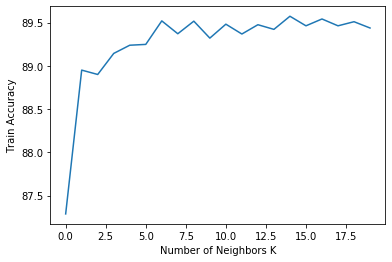

In [71]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_bank3, y, test_size = 0.3, random_state = 10)

#Neighbors
neighbors = np.arange(0,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=3, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.3f (+/- %0.3f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [72]:
# Using k=14 as the final model for prediction
knn3 = KNeighborsClassifier(n_neighbors = 14)

# fitting the model
knn3.fit(X_train, y_train)

# predict the response
y_pred = knn3.predict(X_test)

# evaluate accuracy
show_classifier_metrics(knn3,y_train)

a_knn3,p_knn3,r_knn3,f_knn3 = get_results(y_test,y_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')
confusion matrix of training data
[[27777   147]
 [ 3472   251]]
confusion matrix of test data
[[11828   149]
 [ 1571    16]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11977
           1       0.10      0.01      0.02      1587

    accuracy                           0.87     13564
   macro avg       0.49      0.50      0.48     13564
weighted avg       0.79      0.87      0.83     13564

Accuracy on test data: 87.319375%
Accuracy on training data: 88.564477%
Area under the ROC curve : 0.498821
Accuracy :  0.88
Precision:  0.38
Recall   :  0.04
F1 score :  0.07


### SVM

In [200]:
svc3 = SVC(random_state = 10)
svc3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svc3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc3.score(X_test, y_test)))

# Not scaling further as this model is not overfit

y_pred = svc3.predict(X_test)

show_classifier_metrics(svc3,y_train)

a_svc3,p_svc3,r_svc3,f_svc3 = get_results(y_test,y_pred)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.907
Accuracy on test set: 0.899
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
confusion matrix of training data
[[27568   377]
 [ 2577  1125]]
confusion matrix of test data
[[11494   519]
 [ 1473    78]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12013
           1       0.13      0.05      0.07      1551

    accuracy                           0.85     13564
   macro avg       0.51      0.50      0.50     13564
weighted avg       0.80      0.85      0.82     13564

Accuracy on test data: 85.314067%
Accuracy on training data: 90.665782%
Area under the ROC curve : 0.503543
Accuracy :  0.9
Precision:  0.68
Recall   :  0.26
F1 score :  0.37


### Decision Tree

In [73]:
dtree3 = DecisionTreeClassifier(criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state = 10)
dtree3.fit(X_train, y_train)
dtreepred = dtree3.predict(X_test)

show_classifier_metrics(dtree3,y_train)

a_dt3,p_dt3,r_dt3,f_dt3 = get_results(y_test,dtreepred)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')
confusion matrix of training data
[[27138   786]
 [ 2349  1374]]
confusion matrix of test data
[[11176   801]
 [ 1487   100]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11977
           1       0.11      0.06      0.08      1587

    accuracy                           0.83     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.83      0.81     13564

Accuracy on test data: 83.131820%
Accuracy on training data: 90.093848%
Area under the ROC curve : 0

### Random Forest

In [74]:
rfc3 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5, random_state = 10)
rfc3.fit(X_train, y_train)
rfcpred = rfc3.predict(X_test)

show_classifier_metrics(rfc3,y_train)

a_rf3,p_rf3,r_rf3,f_rf3 = get_results(y_test,rfcpred)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 0.5},
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)
confusion matrix of training data
[[27787   137]
 [ 3132   591]]
confusion matrix of test data
[[11715   262]
 [ 1555    32]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     11977
           1       0.11      0.02      0.03      1587

    accuracy                           0.87     13564
   macro avg       0.50      0.50      0.48     13564
weighted avg       0.79      0.87      0.82     13564

Accuracy on

### Gradient Descent Boosting

In [75]:
gbk3 = GradientBoostingClassifier(random_state = 10)
gbk3.fit(X_train, y_train)
gbkpred = gbk3.predict(X_test)

show_classifier_metrics(gbk3,y_train)

a_gdb3,p_gdb3,r_gdb3,f_gdb3 = get_results(y_test,gbkpred)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
confusion matrix of training data
[[27259   665]
 [ 2341  1382]]
confusion matrix of test data
[[11233   744]
 [ 1495    92]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11977
           1       0.11      0.06      0.08      1587

 

### Bagging

In [76]:
bc_model3 = BaggingClassifier(n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state =10)
bc_model3.fit(X_train, y_train)
bc_model3.score(X_train, y_train)
bcpred = bc_model3.predict(X_test)

show_classifier_metrics(bc_model3,y_train)

a_bb3,p_bb3,r_bb3,f_bb3 = get_results(y_test,bcpred)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=10, verbose=0,
                  warm_start=False)
confusion matrix of training data
[[27920     4]
 [  105  3618]]
confusion matrix of test data
[[11068   909]
 [ 1493    94]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11977
           1       0.09      0.06      0.07      1587

    accuracy                           0.82     13564
   macro avg       0.49      0.49      0.49     13564
weighted avg       0.79      0.82      0.81     13564

Accuracy on test data: 82.291359%
Accuracy on training data: 99.655576%
Area under the ROC curve : 0.491668
Accuracy :  0.9
Precision:  0.6
Recall   :  0.39
F1 score :  0.47


### AdaBoosting

In [77]:
abcl3 = AdaBoostClassifier(base_estimator=dtree3, n_estimators=50, random_state = 10)
abcl3 = abcl3.fit(X_train, y_train)

test_pred = abcl3.predict(X_test)
abcl3.score(X_test, y_test)

show_classifier_metrics(abcl3,y_train)

a_adb3,p_adb3,r_adb3,f_adb3 = get_results(y_test,test_pred)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.5,
                                                                       1: 0.5},
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                      

### Final Score of Model Type 3

In [207]:
df_tempresults3 = pd.DataFrame({'ModelName':['LR','NB','KNN','SVM','DT','RF','GDB','ADB','Bagging'], 
                                'Accuracy':[a_lr3,a_nb3,a_knn3,a_svc3,a_dt3,a_rf3,a_gdb3,a_adb3,a_bb3], 
                                'Recall':[r_lr3,r_nb3,r_knn3,r_svc3,r_dt3,r_rf3,r_gdb3,r_adb3,r_bb3],
                                'Precision':[p_lr3,p_nb3,p_knn3,p_svc3,p_dt3,p_rf3,p_gdb3,p_adb3,p_bb3]})
df_tempresults3

,ModelName,Accuracy,Recall,Precision
0,LR,0.890740,0.206049,0.595628
1,NB,0.838764,0.485822,0.359944
2,KNN,0.895237,0.222432,0.653704
3,SVM,0.899145,0.257089,0.683417
4,DT,0.899956,0.356018,0.627778
5,RF,0.893910,0.122873,0.805785
6,GDB,0.904822,0.397606,0.653209
7,ADB,0.871498,0.488343,0.454279
8,Bagging,0.903273,0.449905,0.619254


# Model Type 4

In [78]:
df_bank4 = pd.read_csv("bank-full.csv")
df_bank4['Target'] = df_bank4['Target'].apply(lambda inc: 0 if inc == "no" else 1) 
df_bank4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [79]:
df_bank4[df_bank4 == 'unknown'].count()

D:\PGP-AIML\Python_Installation\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [80]:
# Replace all 'unknown' with NaNs.

df_bank4 = df_bank4.applymap(lambda x: np.nan if x=='unknown' else x)
df_bank4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


In [81]:
# How many rows will be removed if I remove all the NaN's?

df_bank4.shape[0] - df_bank4.dropna(axis=0).shape[0] 

#37,000 rows will be deleted from the dataset, which is almost like losing 70% of the data. Hence we cannot delete these rows.

37369

In [82]:
# Hence we are simple imputing the NAN values by the most frequent value in he column.

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_bank4 = imp.fit_transform(df_bank4)
df_bank4 = pd.DataFrame(df_bank4)
df_bank4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,0


In [83]:
df_bank4.columns =['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','Target']
df_bank4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,0


[Text(0, 0.5, 'Fraction of people who subscribed')]

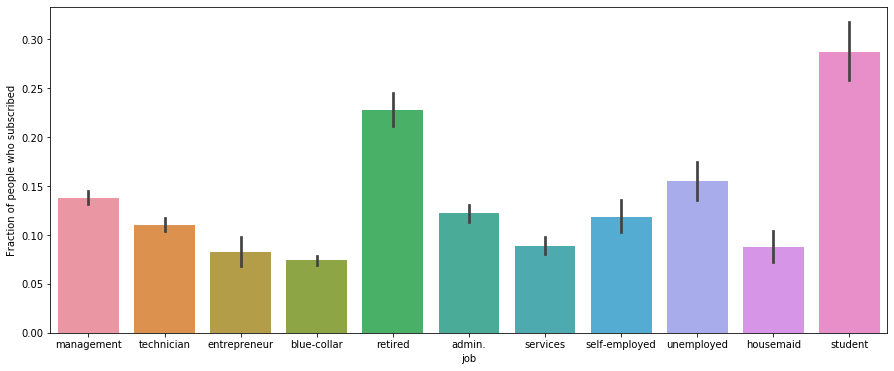

In [84]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='job',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

[Text(0, 0.5, 'Fraction of people who subscribed')]

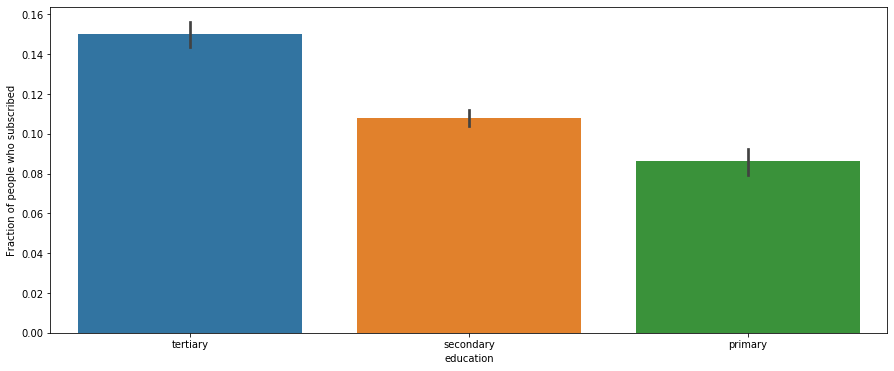

In [85]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='education',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

[Text(0, 0.5, 'Fraction of people who subscribed')]

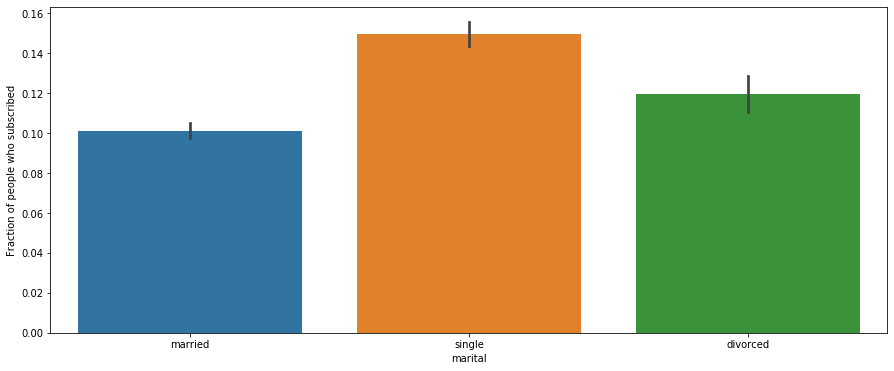

In [86]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='marital',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

[Text(0, 0.5, 'Fraction of people who subscribed')]

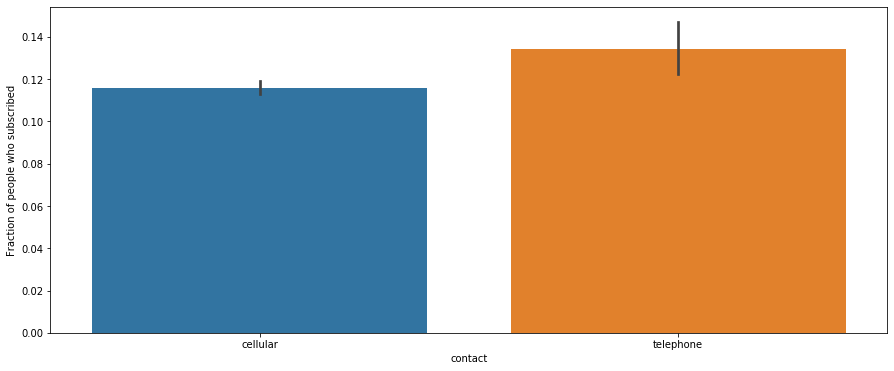

In [87]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='contact',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

[Text(0, 0.5, 'Fraction of people who subscribed')]

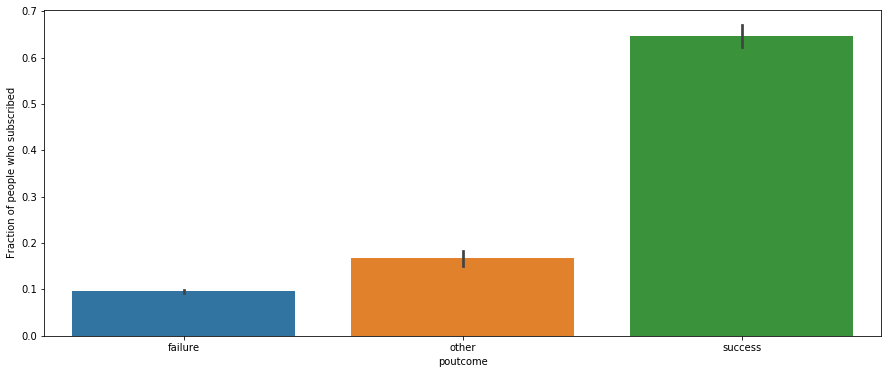

In [88]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='poutcome',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

In [89]:
print('Duration calls above: ', df_bank4['duration'].quantile(q = 0.75) + 
                      1.5*(df_bank4['duration'].quantile(q = 0.75) - df_bank4['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  643.0 are outliers


In [90]:
print('Numerber of outliers: ', df_bank4[df_bank4['duration'] > 643]['duration'].count())
print('Number of clients: ', len(df_bank4))
#Outliers in %
print('Outliers are:', round(df_bank4[df_bank4['duration'] > 643]['duration'].count()*100/len(df_bank4),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


In [91]:
# Setting Target as 0 for calls of duration < 5 seconds

df_bank4[df_bank4['duration'] <=5]['Target'] = 0
df_bank4.head()

D:\PGP-AIML\Python_Installation\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,0


[Text(0, 0.5, 'Fraction of people who subscribed')]

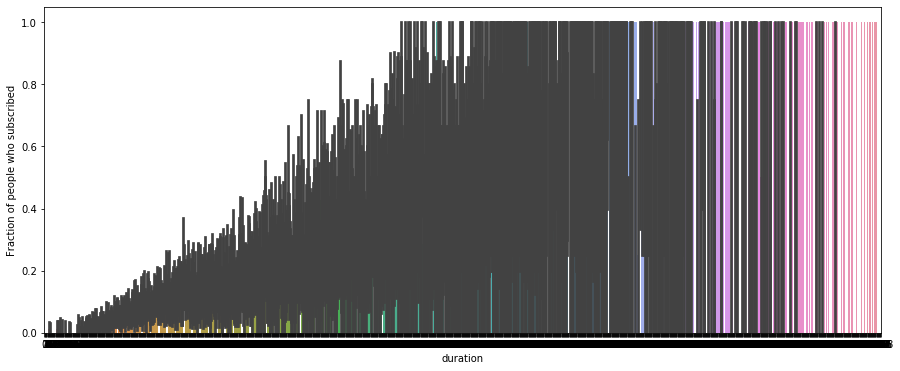

In [243]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='duration',y='Target',data=df_bank4)
ax.set(ylabel='Fraction of people who subscribed')

In [92]:
df_bank4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null object
month        45211 non-null object
duration     45211 non-null object
campaign     45211 non-null object
pdays        45211 non-null object
previous     45211 non-null object
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: object(17)
memory usage: 5.9+ MB


In [93]:
le = LabelEncoder()
# apply le on categorical feature columns
df_bank4['job']      = le.fit_transform(df_bank4['job']) 
df_bank4['marital']  = le.fit_transform(df_bank4['marital']) 
df_bank4['education']= le.fit_transform(df_bank4['education']) 
df_bank4['month']    = le.fit_transform(df_bank4['month']) 
df_bank4['poutcome'] = le.fit_transform(df_bank4['poutcome']) 
df_bank4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,no,2143,yes,no,cellular,5,8,261,1,-1,0,0,0
1,44,9,2,1,no,29,yes,no,cellular,5,8,151,1,-1,0,0,0
2,33,2,1,1,no,2,yes,yes,cellular,5,8,76,1,-1,0,0,0
3,47,1,1,1,no,1506,yes,no,cellular,5,8,92,1,-1,0,0,0
4,33,1,2,1,no,1,no,no,cellular,5,8,198,1,-1,0,0,0


In [94]:
df_bank4.shape

(45211, 17)

In [95]:
# Applying Standard Scalar on Age, Balance and Duration columns as these are very imbalanced.

df_bank4_scaled = df_bank4.copy()
col_names = ['age', 'balance','duration','campaign','pdays','previous']
features = df_bank4_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_bank4_scaled[col_names] = features
df_bank4_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1.606965,4,1,2,no,0.256419,yes,no,cellular,5,8,0.011016,-0.569351,-0.411453,-0.25194,0,0
1,0.288529,9,2,1,no,-0.437895,yes,no,cellular,5,8,-0.416127,-0.569351,-0.411453,-0.25194,0,0
2,-0.747384,2,1,1,no,-0.446762,yes,yes,cellular,5,8,-0.707361,-0.569351,-0.411453,-0.25194,0,0
3,0.571051,1,1,1,no,0.047205,yes,no,cellular,5,8,-0.645231,-0.569351,-0.411453,-0.25194,0,0
4,-0.747384,1,2,1,no,-0.447091,no,no,cellular,5,8,-0.233620,-0.569351,-0.411453,-0.25194,0,0


Here we applied Standard scalar on age, balance, duration, campaign, pdays and previous columns only.

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

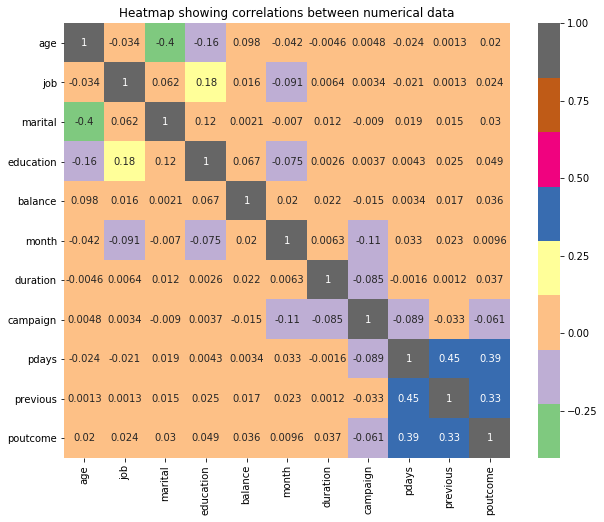

In [96]:
plt.figure(figsize=(10,8))  
sns.heatmap(df_bank4_scaled.corr(),cmap='Accent',annot=True)
plt.title('Heatmap showing correlations between numerical data')

In [97]:
# Now creating dummies for rest of the categorical columns
df_bank4_scaled = pd.get_dummies(df_bank4_scaled,columns=['default','housing','loan','contact'],
               prefix=['isDefault', 'hasHousing', 'hasLoan', 'using'], drop_first=True)
df_bank4_scaled.head()

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,Target,isDefault_yes,hasHousing_yes,hasLoan_yes,using_telephone
0,1.606965,4,1,2,0.256419,5,8,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,1,0,0
1,0.288529,9,2,1,-0.437895,5,8,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,1,0,0
2,-0.747384,2,1,1,-0.446762,5,8,-0.707361,-0.569351,-0.411453,-0.25194,0,0,0,1,1,0
3,0.571051,1,1,1,0.047205,5,8,-0.645231,-0.569351,-0.411453,-0.25194,0,0,0,1,0,0
4,-0.747384,1,2,1,-0.447091,5,8,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,0,0,0


In [98]:
df_bank4_scaled.shape

(45211, 17)

In [99]:
df_bank4_scaled["Target"]= df_bank4_scaled["Target"].astype(int) 
df_bank4_scaled["day"]= df_bank4_scaled["day"].astype(int) 

In [100]:
df_bank4_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age                45211 non-null float64
job                45211 non-null int32
marital            45211 non-null int32
education          45211 non-null int32
balance            45211 non-null float64
day                45211 non-null int32
month              45211 non-null int32
duration           45211 non-null float64
campaign           45211 non-null float64
pdays              45211 non-null float64
previous           45211 non-null float64
poutcome           45211 non-null int32
Target             45211 non-null int32
isDefault_yes      45211 non-null uint8
hasHousing_yes     45211 non-null uint8
hasLoan_yes        45211 non-null uint8
using_telephone    45211 non-null uint8
dtypes: float64(6), int32(7), uint8(4)
memory usage: 3.4 MB


In [103]:
df_bank4_labels = df_bank4_scaled["Target"]
df_bank4_input = df_bank4_scaled.drop(["Target"] , axis = 1)
#Assign X and Y
y = df_bank4_labels
X = df_bank4_input

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


### Logistic Regression

In [104]:
logreg4 = LogisticRegression(random_state=90)
logreg_grid4 = grid_search(logreg4, param, X_train,y_train, n_folds=4)

logreg_grid4.fit(X_train, y_train)
y_pred = logreg_grid4.predict(X_test)
show_classifier_metrics(logreg_grid4)

a_lr4,p_lr4,r_lr4,f_lr4 = get_results(y_test,y_pred)

Doing grid search
Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   14.1s finished
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]mean test score (weighted by split size) of CV rounds:  [0.89951654 0.89951654 0.89951654 0.89951654 0.89954814 0.89954814
 0.89954814 0.89954814 0.89945334 0.89945334 0.89945334 0.89945334]
Best parameter set {'C': 5, 'max_iter': 100, 'verbose': 1} Corresponding mean CV score 0.8995481404240528
[LibLinear]

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=90, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)
confusion matrix of training data
[[26413  1532]
 [ 3501   201]]
confusion matrix of test data
[[11323   654]
 [ 1491    96]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11977
           1       0.13      0.06      0.08      1587

    accuracy                           0.84     13564
   macro avg       0.51      0.50      0.50     13564
weighted avg       0.80      0.84      0.82     13564

Accuracy on test data: 84.186081%
Accuracy on training data: 84.096439%
Area under the ROC curve : 0.502943
Accuracy :  0.9
Precision:  0.65
Recall   :  0.3
F1 score :  0.41


### Nave Bayes

In [105]:
NBmodel4 = GaussianNB()
NBmodel4.fit(X_train, y_train)
print(NBmodel4)

# make predictions
expected = y_test
predicted = NBmodel4.predict(X_test)

# summarize the fit of the model
show_classifier_metrics(NBmodel4,y_train)

a_nb4,p_nb4,r_nb4,f_nb4 = get_results(y_test,predicted)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[25613  2344]
 [ 1961  1729]]
confusion matrix of test data
[[10488  1489]
 [ 1373   214]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11977
           1       0.13      0.13      0.13      1587

    accuracy                           0.79     13564
   macro avg       0.50      0.51      0.51     13564
weighted avg       0.80      0.79      0.79     13564

Accuracy on test data: 78.900029%
Accuracy on training data: 86.396815%
Area under the ROC curve : 0.505262
Accuracy :  0.87
Precision:  0.44
Recall   :  0.46
F1 score :  0.45


### KNN

k=1 87.7777 (+/- 0.6128)
k=2 88.8868 (+/- 0.6096)
k=3 89.1333 (+/- 0.6128)
k=4 89.1586 (+/- 0.5819)
k=5 89.3482 (+/- 0.5634)
k=6 89.2755 (+/- 0.5579)
k=7 89.4082 (+/- 0.4639)
k=8 89.3261 (+/- 0.5696)
k=9 89.4619 (+/- 0.5031)
k=10 89.2060 (+/- 0.5210)
k=11 89.4303 (+/- 0.5771)
k=12 89.2597 (+/- 0.5749)
k=13 89.3987 (+/- 0.6154)
k=14 89.1333 (+/- 0.5645)
k=15 89.2565 (+/- 0.6095)
k=16 89.1554 (+/- 0.6161)
k=17 89.2534 (+/- 0.6452)
k=18 89.1144 (+/- 0.6264)
k=19 89.1839 (+/- 0.6720)
k=20 89.0575 (+/- 0.6391)
The optimal number of neighbors is 8 with 89.5%


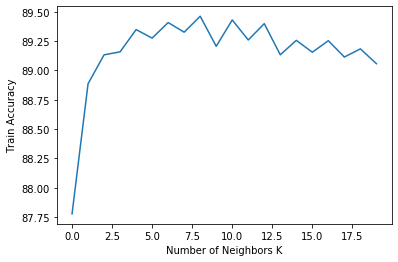

In [109]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_bank4, y, test_size = 0.5, random_state = 90)

#Neighbors
neighbors = np.arange(0,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=4, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=90)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.4f (+/- %0.4f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [110]:
# Using k=8 as the final model for prediction
knn4 = KNeighborsClassifier(n_neighbors = 8)

# fitting the model
knn4.fit(X_train, y_train)

# predict the response
y_pred = knn4.predict(X_test)

# evaluate accuracy
show_classifier_metrics(knn4,y_train)

a_knn4,p_knn4,r_knn4,f_knn4 = get_results(y_test,y_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
confusion matrix of training data
[[27729   228]
 [ 2759   931]]
confusion matrix of test data
[[11552   425]
 [ 1532    55]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11977
           1       0.11      0.03      0.05      1587

    accuracy                           0.86     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.86      0.82     13564

Accuracy on test data: 85.572103%
Accuracy on training data: 90.561507%
Area under the ROC curve : 0.499586
Accuracy :  0.89
Precision:  0.63
Recall   :  0.19
F1 score :  0.29


### SVM

In [344]:
svc4 = SVC(random_state = 90)
svc4.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(svc4.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(svc4.score(X_test, y_test)))

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.9178
Accuracy on test set: 0.8996


In [345]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# More scaling of data

In [346]:
svc = SVC(random_state = 90)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.4f}".format(svc.score(X_test_scaled, y_test)))

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.8919
Accuracy on test set: 0.8930


In [347]:
svc = SVC(random_state = 90,C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.4f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.4f}".format(svc.score(X_test_scaled, y_test)))

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.8956
Accuracy on test set: 0.8961


In [349]:
y_pred = svc4.predict(X_test)

show_classifier_metrics(svc4,y_train)

a_svc4,p_svc4,r_svc4,f_svc4 = get_results(y_test,y_pred)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=90,
    shrinking=True, tol=0.001, verbose=False)
confusion matrix of training data
[[27686   259]
 [ 2341  1361]]
confusion matrix of test data
[[11463   550]
 [ 1476    75]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12013
           1       0.12      0.05      0.07      1551

    accuracy                           0.85     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.80      0.85      0.82     13564

Accuracy on test data: 85.063403%
Accuracy on training data: 91.784371%
Area under the ROC curve : 0.501286
Accuracy :  0.9
Precision:  0.68
Recall   :  0.27
F1 score :  0.38


### Decision Tree

In [111]:
dtree4 = DecisionTreeClassifier(criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5, random_state = 90)
dtree4.fit(X_train, y_train)
dtreepred = dtree4.predict(X_test)

show_classifier_metrics(dtree4,y_train)

a_dt4,p_dt4,r_dt4,f_dt4 = get_results(y_test,dtreepred)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=90, splitter='best')
confusion matrix of training data
[[27271   686]
 [ 2348  1342]]
confusion matrix of test data
[[11204   773]
 [ 1479   108]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11977
           1       0.12      0.07      0.09      1587

    accuracy                           0.83     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.79      0.83      0.81     13564

Accuracy on test data: 83.397228%
Accuracy on training data: 90.412993%
Area under the ROC curve : 0

### Random Forest

In [112]:
rfc4 = RandomForestClassifier(n_estimators = 400,criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state = 90)
rfc4.fit(X_train, y_train)
rfcpred = rfc4.predict(X_test)

show_classifier_metrics(rfc4,y_train)

a_rf4,p_rf4,r_rf4,f_rf4 = get_results(y_test,rfcpred)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 0.5},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=90, verbose=0, warm_start=False)
confusion matrix of training data
[[27803   154]
 [ 3069   621]]
confusion matrix of test data
[[11673   304]
 [ 1543    44]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     11977
           1       0.13      0.03      0.05      1587

    accuracy                           0.86     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.86      0.82     13564

Accuracy on te

### Gradient Descent Boosting

In [113]:
gbk4 = GradientBoostingClassifier(random_state = 90)
gbk4.fit(X_train, y_train)
gbkpred = gbk4.predict(X_test)

show_classifier_metrics(gbk4,y_train)

a_gdb4,p_gdb4,r_gdb4,f_gdb4 = get_results(y_test,gbkpred)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=90, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
confusion matrix of training data
[[27268   689]
 [ 2145  1545]]
confusion matrix of test data
[[11109   868]
 [ 1464   123]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11977
           1       0.12      0.08      0.10      1587

 

In [353]:
params ={'max_depth' : [3,5,8], 'min_samples_leaf' : [3,5,7,10] }
gradboost_model_gridsearch = GridSearchCV(gbk4, param_grid = params, scoring = 'accuracy', cv = 10)
gradboost_model_gridsearch.fit(X_train, y_train)
gradboost_model_gridsearch.score(X_train, y_train)
gradboost_model_gridsearch.score(X_test, y_test)
y_predict = gradboost_model_gridsearch.predict(X_test)

In [354]:
show_classifier_metrics(gradboost_model_gridsearch,y_train)

a_gdb4,p_gdb4,r_gdb4,f_gdb4 = get_results(y_test,y_predict)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

### Bagging

In [114]:
bc_model4 = BaggingClassifier(n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state =90)
bc_model4.fit(X_train, y_train)
bc_model4.score(X_train, y_train)
bcpred = bc_model4.predict(X_test)

show_classifier_metrics(bc_model4,y_train)

a_bb4,p_bb4,r_bb4,f_bb4 = get_results(y_test,bcpred)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=90, verbose=0,
                  warm_start=False)
confusion matrix of training data
[[27953     4]
 [   89  3601]]
confusion matrix of test data
[[11031   946]
 [ 1446   141]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11977
           1       0.13      0.09      0.11      1587

    accuracy                           0.82     13564
   macro avg       0.51      0.50      0.50     13564
weighted avg       0.80      0.82      0.81     13564

Accuracy on test data: 82.365084%
Accuracy on training data: 99.706133%
Area under the ROC curve : 0.504931
Accuracy :  0.9
Precision:  0.62
Recall   :  0.42
F1 score :  0.51


### AdaBoosting

In [115]:
abcl4 = AdaBoostClassifier(base_estimator=dtree4, n_estimators=50,random_state = 90)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl4 = abcl4.fit(X_train, y_train)

test_pred = abcl4.predict(X_test)
abcl4.score(X_test, y_test)

show_classifier_metrics(abcl4,y_train)

a_adb4,p_adb4,r_adb4,f_adb4 = get_results(y_test,test_pred)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.5,
                                                                       1: 0.5},
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                      

### Final score of Model Type 4

In [358]:
df_tempresults4 = pd.DataFrame({'ModelName':['LR','NB','KNN','SVM','DT','RF','GDB','ADB','Bagging'], 
                                'Accuracy':[a_lr4,a_nb4,a_knn4,a_svc4,a_dt4,a_rf4,a_gdb4,a_adb4,a_bb4], 
                                'Recall':[r_lr4,r_nb4,r_knn4,r_svc4,r_dt4,r_rf4,r_gdb4,r_adb4,r_bb4],
                                'Precision':[p_lr4,p_nb4,p_knn4,p_svc4,p_dt4,p_rf4,p_gdb4,p_adb4,p_bb4]})
df_tempresults4

,ModelName,Accuracy,Recall,Precision
0,LR,0.898924,0.304348,0.644000
1,NB,0.867517,0.461248,0.437276
2,KNN,0.891772,0.131065,0.700337
3,SVM,0.899587,0.267801,0.680000
4,DT,0.900177,0.350347,0.632537
5,RF,0.896196,0.156270,0.782334
6,GDB,0.905190,0.432892,0.640261
7,ADB,0.868402,0.459357,0.440217
8,Bagging,0.902168,0.422180,0.620370


# Model Type 5

In [420]:
df_bank5 = pd.read_csv("bank-full.csv")
df_bank5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [421]:
df_bank5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [422]:
for feature in df_bank5.columns:
    if df_bank5[feature].dtype == 'object':
        df_bank5[feature]=le.fit_transform(df_bank5[feature])
df_bank5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [423]:
df_bank5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [424]:
df_bank5['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [425]:
X = df_bank5.drop('Target', axis = 1)
y= df_bank5.pop('Target')

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

In [428]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Target==0]
fraud = X[X.Target==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=9) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Target.value_counts()

1    27958
0    27958
Name: Target, dtype: int64

In [435]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55916, 16)
(55916,)
(13564, 16)
(13564,)


In [439]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
23901,41,4,2,2,0,2408,0,0,0,29,1,122,2,-1,0,3,0
44492,25,8,2,1,0,348,0,0,0,10,1,245,1,-1,0,3,1
22498,38,6,1,2,0,656,1,0,0,22,1,508,7,-1,0,3,0
11813,27,0,1,1,0,-48,1,0,2,20,6,168,2,-1,0,3,0
21195,45,4,0,2,0,2307,0,0,0,14,1,126,3,-1,0,3,0


In [440]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

### Logistic Regression

In [442]:
upsampled = LogisticRegression(random_state = 9)
upsampled.fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

show_classifier_metrics(upsampled,y_train)

a_lr5,p_lr5,r_lr5,f_lr5 = get_results(y_test,upsampled_pred)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
confusion matrix of training data
[[22470  5488]
 [ 5450 22508]]
confusion matrix of test data
[[8803 3210]
 [1119  432]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     12013
           1       0.12      0.28      0.17      1551

    accuracy                           0.68     13564
   macro avg       0.50      0.51      0.48     13564
weighted avg       0.80      0.68      0.73     13564

Accuracy on test data: 68.084636%
Accuracy on training data: 80.438515%
Area under the ROC curve : 0.505660
Accuracy :  0.8
Precision:  0.35
Recall   :  0.79
F1 score :  0.48


### Nave Bayes

In [443]:
NBmodel5 = GaussianNB()
NBmodel5.fit(X_train, y_train)
print(NBmodel5)

# make predictions
expected = y_test
predicted = NBmodel5.predict(X_test)

# summarize the fit of the model
show_classifier_metrics(NBmodel5,y_train)

a_nb5,p_nb5,r_nb5,f_nb5 = get_results(y_test,predicted)

GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[20213  7745]
 [ 5755 22203]]
confusion matrix of test data
[[7995 4018]
 [1017  534]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.67      0.76     12013
           1       0.12      0.34      0.17      1551

    accuracy                           0.63     13564
   macro avg       0.50      0.50      0.47     13564
weighted avg       0.80      0.63      0.69     13564

Accuracy on test data: 62.879682%
Accuracy on training data: 75.856642%
Area under the ROC curve : 0.504912
Accuracy :  0.73
Precision:  0.28
Recall   :  0.78
F1 score :  0.41


### KNN

k=1 82.93740 (+/- 0.63008)
k=2 87.47177 (+/- 0.65307)
k=3 86.37468 (+/- 0.63373)
k=4 87.66641 (+/- 0.74289)
k=5 87.30810 (+/- 0.72840)
k=6 87.80355 (+/- 0.83277)
k=7 87.60005 (+/- 0.79927)
k=8 87.96281 (+/- 0.73714)
k=9 87.73277 (+/- 0.77852)
k=10 87.97167 (+/- 0.75727)
k=11 87.91416 (+/- 0.76642)
k=12 87.97166 (+/- 0.79916)
k=13 87.97168 (+/- 0.77251)
k=14 87.97609 (+/- 0.75223)
k=15 87.89648 (+/- 0.70456)
k=16 87.96725 (+/- 0.73295)
k=17 87.90533 (+/- 0.79846)
k=18 88.00264 (+/- 0.74612)
k=19 87.98052 (+/- 0.67056)
k=20 88.07783 (+/- 0.76530)
The optimal number of neighbors is 19 with 88.1%


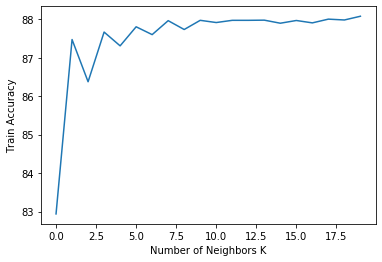

In [444]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df_bank5, y, test_size = 0.5, random_state = 9)

#Neighbors
neighbors = np.arange(0,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=5, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=9)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.5f (+/- %0.5f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [445]:
# Using k=19 as the final model for prediction
knn5 = KNeighborsClassifier(n_neighbors = 19)

# fitting the model
knn5.fit(X_train, y_train)

# predict the response
y_pred = knn5.predict(X_test)

# evaluate accuracy
show_classifier_metrics(knn5,y_train)

a_knn5,p_knn5,r_knn5,f_knn5 = get_results(y_test,y_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
confusion matrix of training data
[[21731  6227]
 [ 3148 24810]]
confusion matrix of test data
[[8450 3563]
 [1088  463]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     12013
           1       0.12      0.30      0.17      1551

    accuracy                           0.66     13564
   macro avg       0.50      0.50      0.48     13564
weighted avg       0.80      0.66      0.71     13564

Accuracy on test data: 65.710705%
Accuracy on training data: 83.233779%
Area under the ROC curve : 0.500961
Accuracy :  0.76
Precision:  0.29
Recall   :  0.72
F1 score :  0.41


### SVM

In [446]:
svc5 = SVC(random_state = 90)
svc5.fit(X_train, y_train)

print("Accuracy on training set: {:.5f}".format(svc5.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(svc5.score(X_test, y_test)))

# Not scaling further as this model is not overfit

y_pred = svc5.predict(X_test)

show_classifier_metrics(svc5,y_train)

a_svc5,p_svc5,r_svc5,f_svc5 = get_results(y_test,y_pred)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 1.00000
Accuracy on test set: 0.88189
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=89,
    shrinking=True, tol=0.001, verbose=False)
confusion matrix of training data
[[27958     0]
 [    0 27958]]
confusion matrix of test data
[[12011     2]
 [ 1551     0]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.00      0.00      0.00      1551

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564

Accuracy on test data: 88.550575%
Accuracy on training data: 100.000000%
Area under the ROC curve : 0.499917


D:\PGP-AIML\Python_Installation\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Accuracy :  0.88
Precision:  0.0
Recall   :  0.0
F1 score :  nan


### Decision Tree

In [450]:
dtree5 = DecisionTreeClassifier(criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state=9)
dtree5.fit(X_train, y_train)
dtreepred = dtree5.predict(X_test)

show_classifier_metrics(dtree5,y_train)

a_dt5,p_dt5,r_dt5,f_dt5 = get_results(y_test,dtreepred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
confusion matrix of training data
[[27958     0]
 [    0 27958]]
confusion matrix of test data
[[10641  1372]
 [ 1359   192]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12013
           1       0.12      0.12      0.12      1551

    accuracy                           0.80     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.80      0.80      0.80     13564

Accuracy on test data: 79.865821%
Accuracy on training data: 100.000000%
Area under the ROC curve : 0.50479

### Random Forest

In [451]:
rfc5 = RandomForestClassifier(n_estimators = 500,criterion='gini',class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state=9)
rfcpred = rfc5.predict(X_test)

show_classifier_metrics(rfc5,y_train)

a_rf5,p_rf5,r_rf5,f_rf5 = get_results(y_test,rfcpred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix of training data
[[27958     0]
 [    0 27958]]
confusion matrix of test data
[[10730  1283]
 [ 1379   172]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12013
           1       0.12      0.11      0.11      1551

    accuracy                           0.80     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.80      0.80      0.80     13564

Accuracy on test data

### Gradient Descent Boosting

In [452]:
gbk5 = GradientBoostingClassifier(random_state=9)
gbk5.fit(X_train, y_train)
gbkpred = gbk5.predict(X_test)

show_classifier_metrics(gbk5,y_train)

a_gdb5,p_gdb5,r_gdb5,f_gdb5 = get_results(y_test,gbkpred)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
confusion matrix of training data
[[23221  4737]
 [ 2918 25040]]
confusion matrix of test data
[[8934 3079]
 [1159  392]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     12013
           1       0.11      0.25      0.16      1551

   

### Bagging

In [453]:
bc_model5 = BaggingClassifier(n_estimators = 50, max_samples = 0.8, bootstrap = True, oob_score = True, random_state=9)
bc_model5.fit(X_train, y_train)
bc_model5.score(X_train, y_train)
bcpred = bc_model5.predict(X_test)

show_classifier_metrics(bc_model5,y_train)

a_bb5,p_bb5,r_bb5,f_bb5 = get_results(y_test,bcpred)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=55, verbose=0,
                  warm_start=False)
confusion matrix of training data
[[27938    20]
 [    0 27958]]
confusion matrix of test data
[[10492  1521]
 [ 1355   196]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12013
           1       0.11      0.13      0.12      1551

    accuracy                           0.79     13564
   macro avg       0.50      0.50      0.50     13564
weighted avg       0.80      0.79      0.79     13564

Accuracy on test data: 78.796815%
Accuracy on training data: 99.964232%
Area under the ROC curve : 0.499879
Accuracy :  0.89
Precision:  0.54
Recall   :  0.58
F1 score :  0.56


### AdaBoosting

In [454]:
from sklearn.ensemble import AdaBoostClassifier
abcl5 = AdaBoostClassifier(base_estimator=dtree5, n_estimators=50,random_state=9)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl5 = abcl5.fit(X_train, y_train)

test_pred = abcl5.predict(X_test)
abcl5.score(X_test, y_test)

show_classifier_metrics(abcl5,y_train)

a_adb5,p_adb5,r_adb5,f_adb5 = get_results(y_test,test_pred)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

### Final Score of Model Type 5

In [455]:
df_tempresults5 = pd.DataFrame({'ModelName':['LR','NB','KNN','SVM','DT','RF','GDB','ADB','Bagging'], 
                                'Accuracy':[a_lr5,a_nb5,a_knn5,a_svc5,a_dt5,a_rf5,a_gdb5,a_adb5,a_bb5], 
                                'Recall':[r_lr5,r_nb5,r_knn5,r_svc5,r_dt5,r_rf5,r_gdb5,r_adb5,r_bb5],
                                'Precision':[p_lr5,p_nb5,p_knn5,p_svc5,p_dt5,p_rf5,p_gdb5,p_adb5,p_bb5]})
df_tempresults5

,ModelName,Accuracy,Recall,Precision
0,LR,0.799764,0.789375,0.346787
1,NB,0.731495,0.784375,0.275703
2,KNN,0.755972,0.723750,0.287630
3,SVM,0.881893,0.000000,0.000000
4,DT,0.873194,0.451250,0.461637
5,RF,0.902462,0.541250,0.595189
6,GDB,0.832277,0.873750,0.402766
7,ADB,0.871129,0.453125,0.453692
8,Bagging,0.892731,0.581875,0.542225


# Comparison of results of different models

In [456]:
print("Model 1")
print(df_tempresults)

print("Model 2")
print(df_tempresults2)

print("Model 3")
print(df_tempresults3)

print("Model 4")
print(df_tempresults4)

print("Model 5")
print(df_tempresults5)

Model 1
  ModelName  Accuracy    Recall  Precision
0        LR  0.896564  0.259188   0.612805
1        NB  0.858817  0.330754   0.369065
2       KNN  0.883147  0.076080   0.437037
3       SVM  0.885948  0.003224   0.833333
4        DT  0.865305  0.467440   0.420046
5        RF  0.900840  0.405545   0.597909
6       GDB  0.901578  0.360413   0.619734
7       XGB  0.900619  0.650000   0.770000
8       ADB  0.864421  0.466151   0.416955
9   Bagging  0.900472  0.435848   0.587315
Model 2
  ModelName  Accuracy    Recall  Precision
0        LR  0.890740  0.206049   0.595628
1        NB  0.838764  0.485822   0.359944
2       KNN  0.895901  0.280403   0.622378
3       SVM  0.899145  0.257089   0.683417
4        DT  0.874668  0.500315   0.466784
5        RF  0.908065  0.427851   0.666994
6       GDB  0.904822  0.397606   0.653209
7       ADB  0.872973  0.487713   0.459620
8   Bagging  0.903421  0.448015   0.620961
Model 3
  ModelName  Accuracy    Recall  Precision
0        LR  0.890740  0.20604

# Conclusion

Here are my 5 models and explanation of how they are built along with their average accuracy of all algorithms.

#### Type 1: 
##### By replacing missing values with the mode value, and not using Label Encoding and Manually encoding categorical columns into suitable labels.
### Accuracy: 88.2% average
        
#### Type 2: 
##### Using Z-Score transformation on all columns to standarize data.
### Accuracy: 88.5% average
        
#### Type 3: 
##### Using Standard Scalar transformation on all columns to standarize data.
### Accuracy: 88.6% average
        
#### Type 4: 
##### By replacing missing values with most frequent values of the column, label encoding some categoricalcolumns which has <3 number of categories, using one-hot encoding of categorical columns with <=2 number of categories, by Standard Scaling of continuos columns and using Grid Search in different algorithms.
### Accuracy: 89.20% average

#### Type 5: 
##### By upsampling the imbalanced Target column.
### Accuracy: 83. 5% average

The Type 4 Model is the most dedicatedly made and also it provides better accuracy. Hence, the Type 4 Model is the one to use in this dataset.